In [1]:
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = (30, 30)
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
path = 'results/Auto/genero-m1_es_adjetivocolores-m2.xlsx'
df = pd.read_excel('../' + path)
df

Unnamed: 0    type  test_uid    score_m    score_f  \
0             0  simple         1 -20.879981  -7.668495   
1             1  simple         2 -19.463654  -8.418145   
2             2  simple         3 -21.023706  -8.439474   
3             3  simple         4 -18.758879  -6.495866   
4             4  simple         5 -20.314156  -7.599558   
..          ...     ...       ...        ...        ...   
395         395  simple       396 -12.348877 -11.951503   
396         396  simple       397 -12.016162 -19.882869   
397         397  simple       398 -11.118802 -13.778945   
398         398  simple       399  -7.650198 -11.407782   
399         399  simple       400 -16.311007 -20.718667   

             masked_sentence_m      masked_sentence_f target_value_m  \
0              [MASK] es adobe        [MASK] es adobe             él   
1        [MASK] es albaricoque  [MASK] es albaricoque             él   
2            [MASK] es almagre      [MASK] es almagre             él   
3           [MASK] es almendra     [MASK] es almendra             él   
4    [MASK] es amarillo pálido     [MASK] es amarillo             él   
..                         ...                    ...            ...   
395         [MASK] es turquesa     [MASK] es turquesa          aquel   
396           [MASK] es turquí       [MASK] es turquí          aquel   
397            [MASK] es verde        [MASK] es verde          aquel   
398             [MASK] es vino         [MASK] es vino          aquel   
399           [MASK] es violín       [MASK] es violín          aquel   

    target_value_f  
0             ella  
1             ella  
2             ella  
3             ella  
4             ella  
..             ...  
395        aquella  
396        aquella  
397        aquella  
398        aquella  
399        aquella  

[400 rows x 9 columns]

In [3]:
data = df.values
data

array([[0, 'simple', 1, ..., '[MASK] es adobe', 'él', 'ella'],
       [1, 'simple', 2, ..., '[MASK] es albaricoque', 'él', 'ella'],
       [2, 'simple', 3, ..., '[MASK] es almagre', 'él', 'ella'],
       ...,
       [397, 'simple', 398, ..., '[MASK] es verde', 'aquel', 'aquella'],
       [398, 'simple', 399, ..., '[MASK] es vino', 'aquel', 'aquella'],
       [399, 'simple', 400, ..., '[MASK] es violín', 'aquel', 'aquella']],
      dtype=object)

<AxesSubplot:xlabel='score_m'>

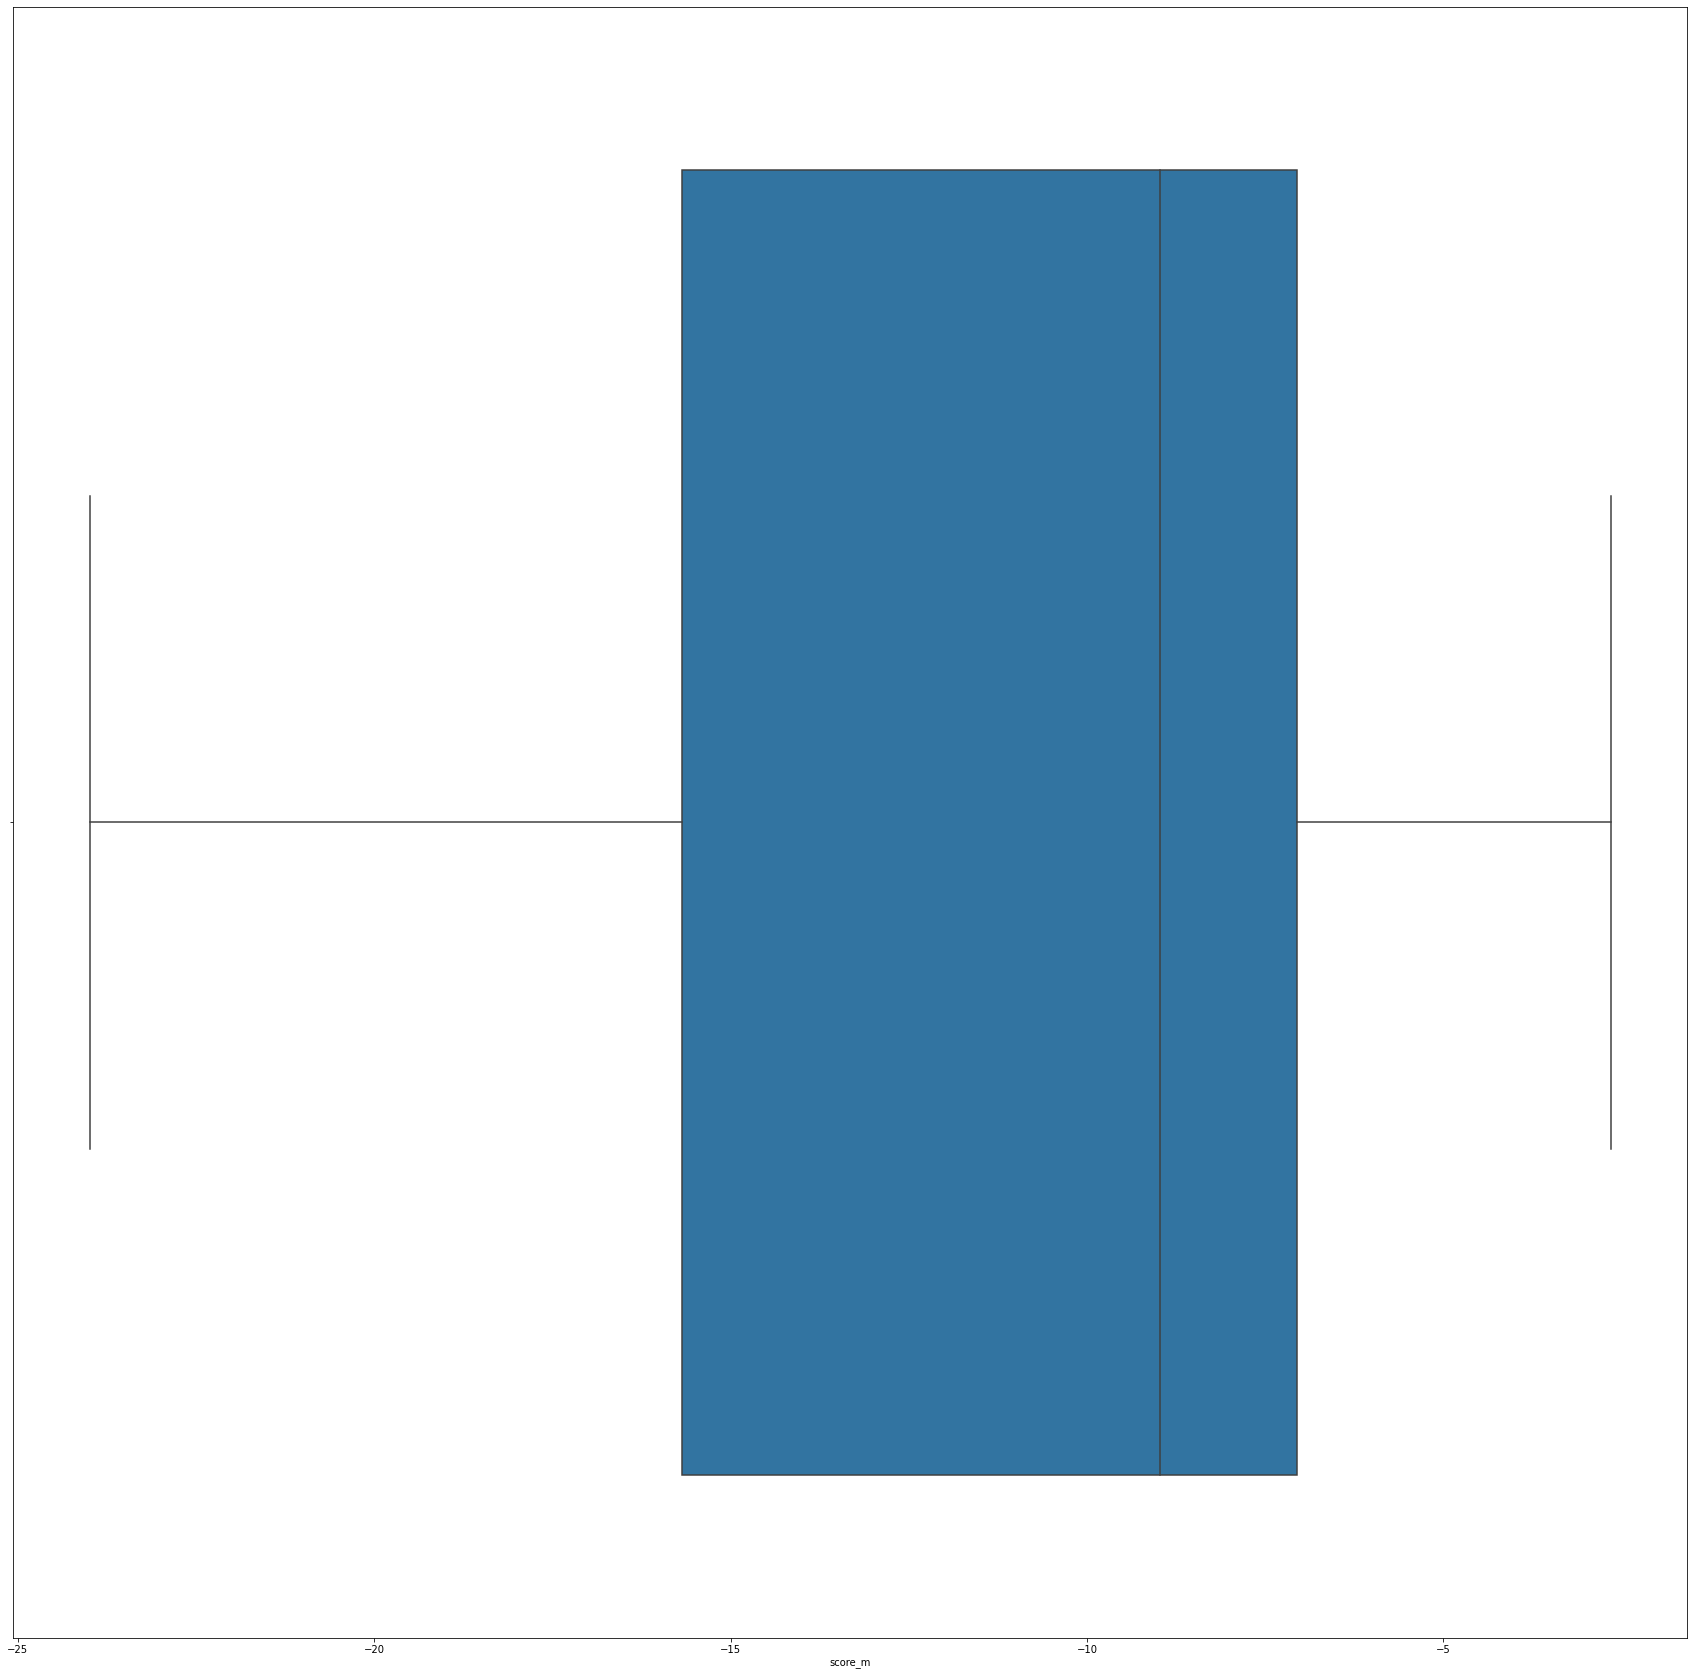

In [4]:
sns.boxplot(x=df['score_m'])

<AxesSubplot:xlabel='score_f'>

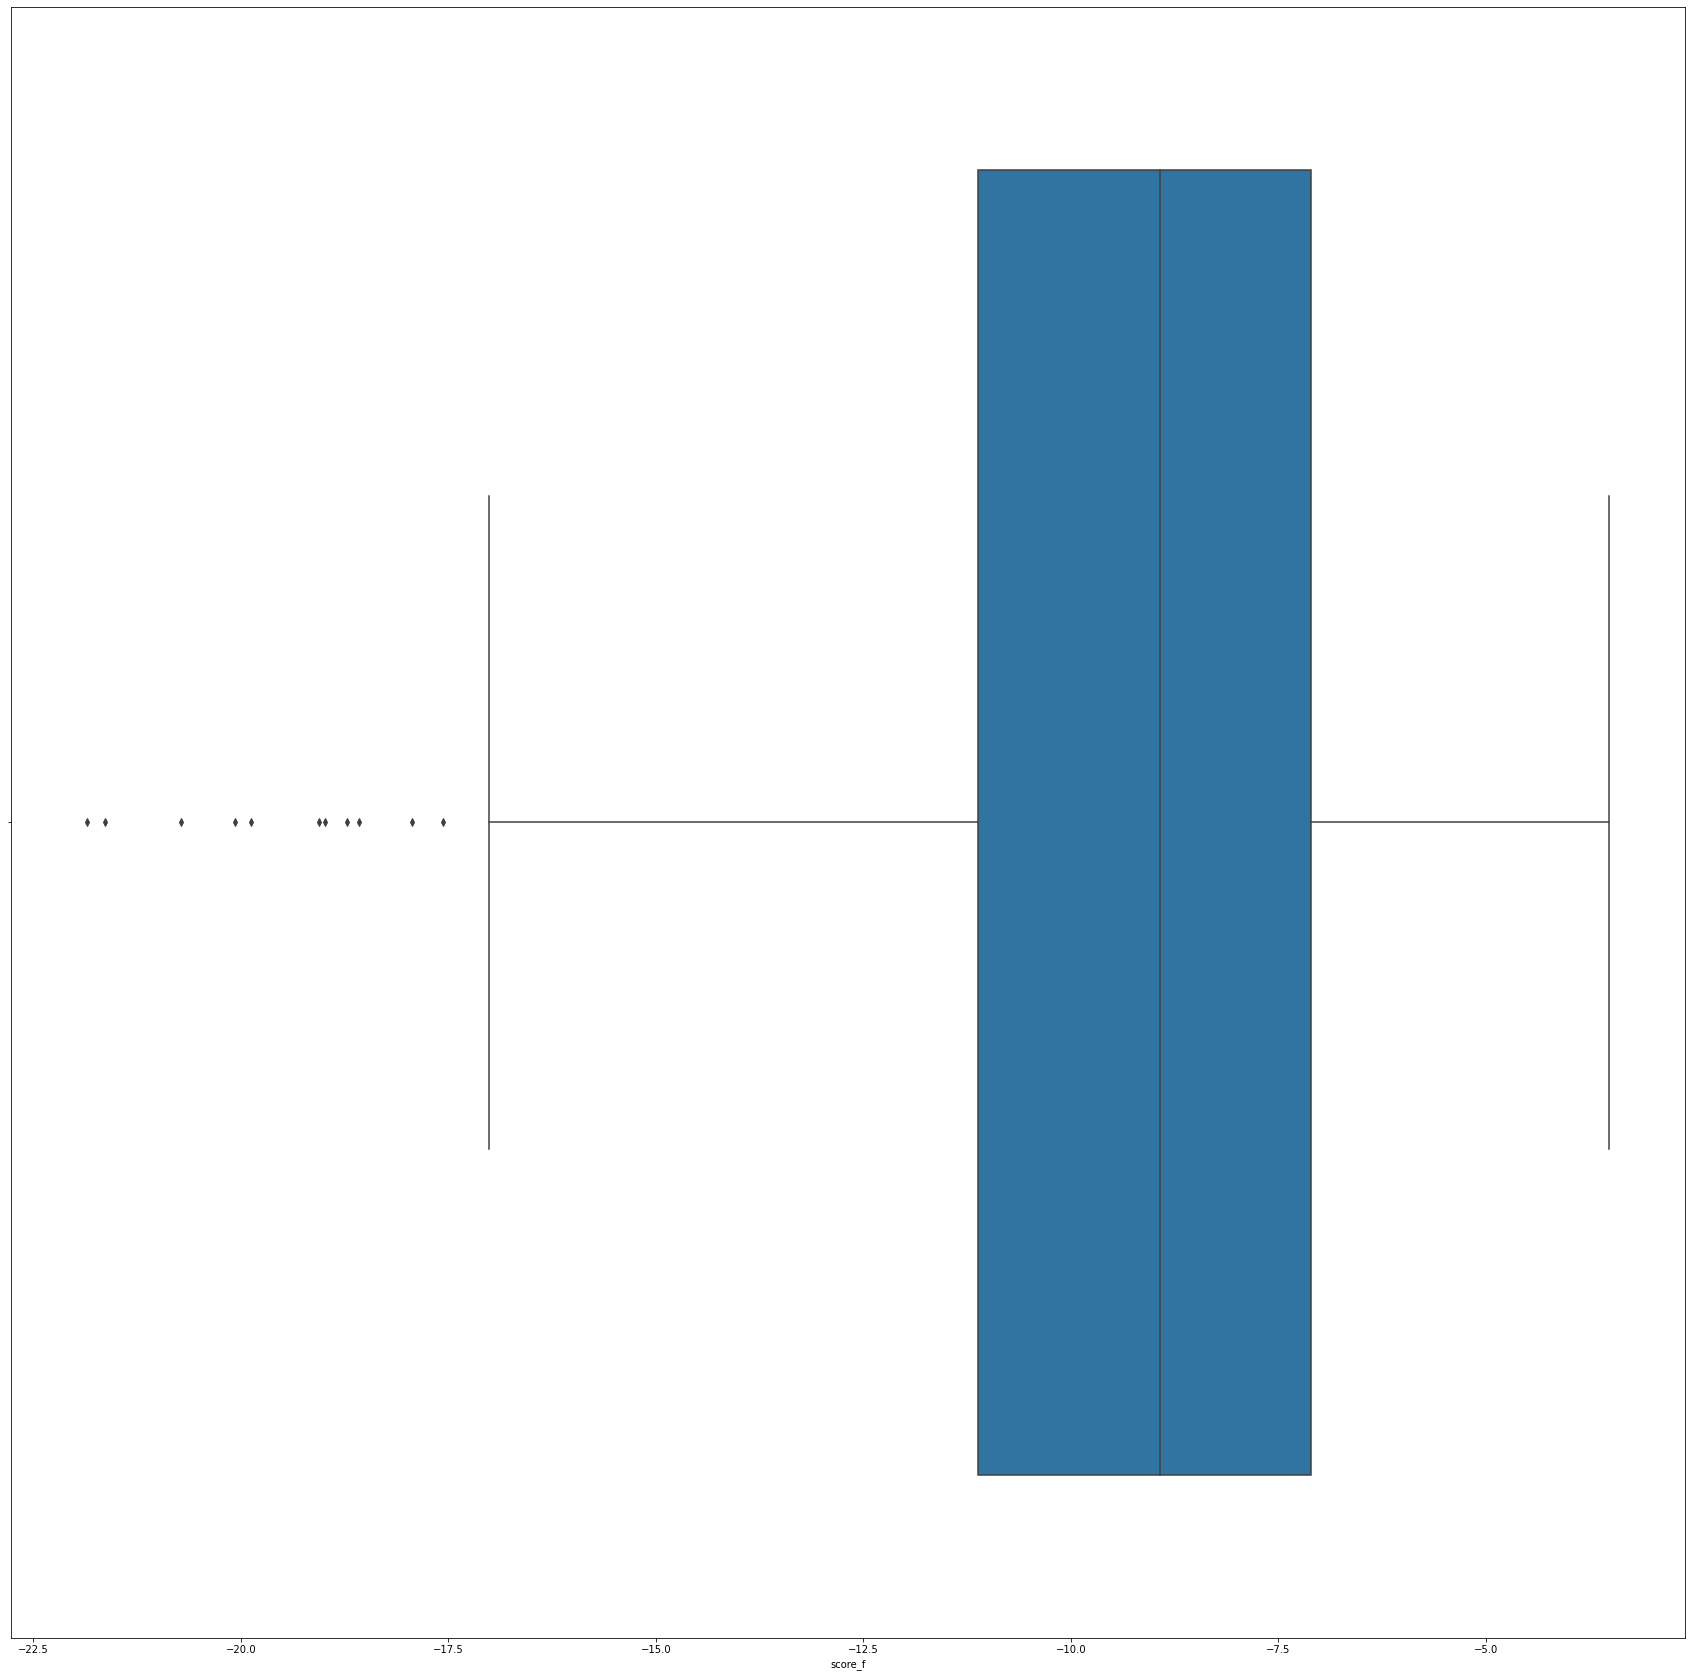

In [5]:
sns.boxplot(x=df['score_f'])

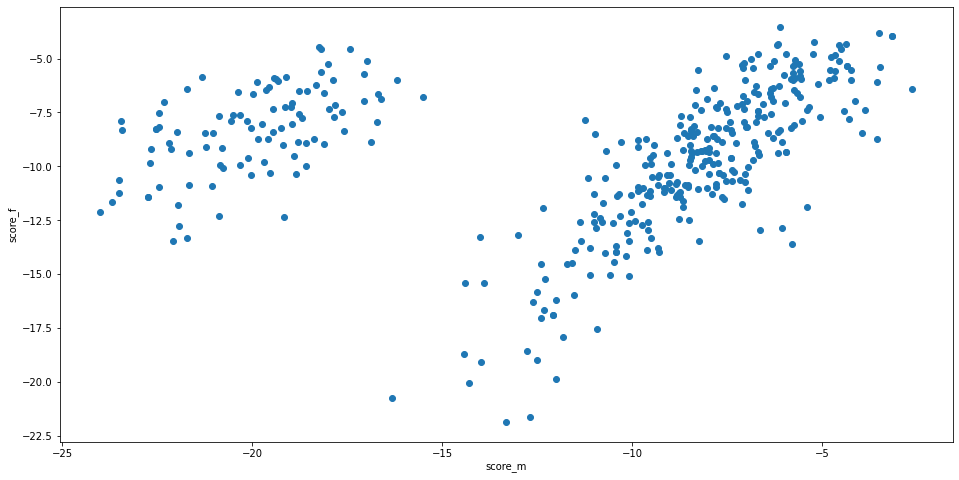

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['score_m'], df['score_f'])
ax.set_xlabel('score_m')
ax.set_ylabel('score_f')
plt.show()

    

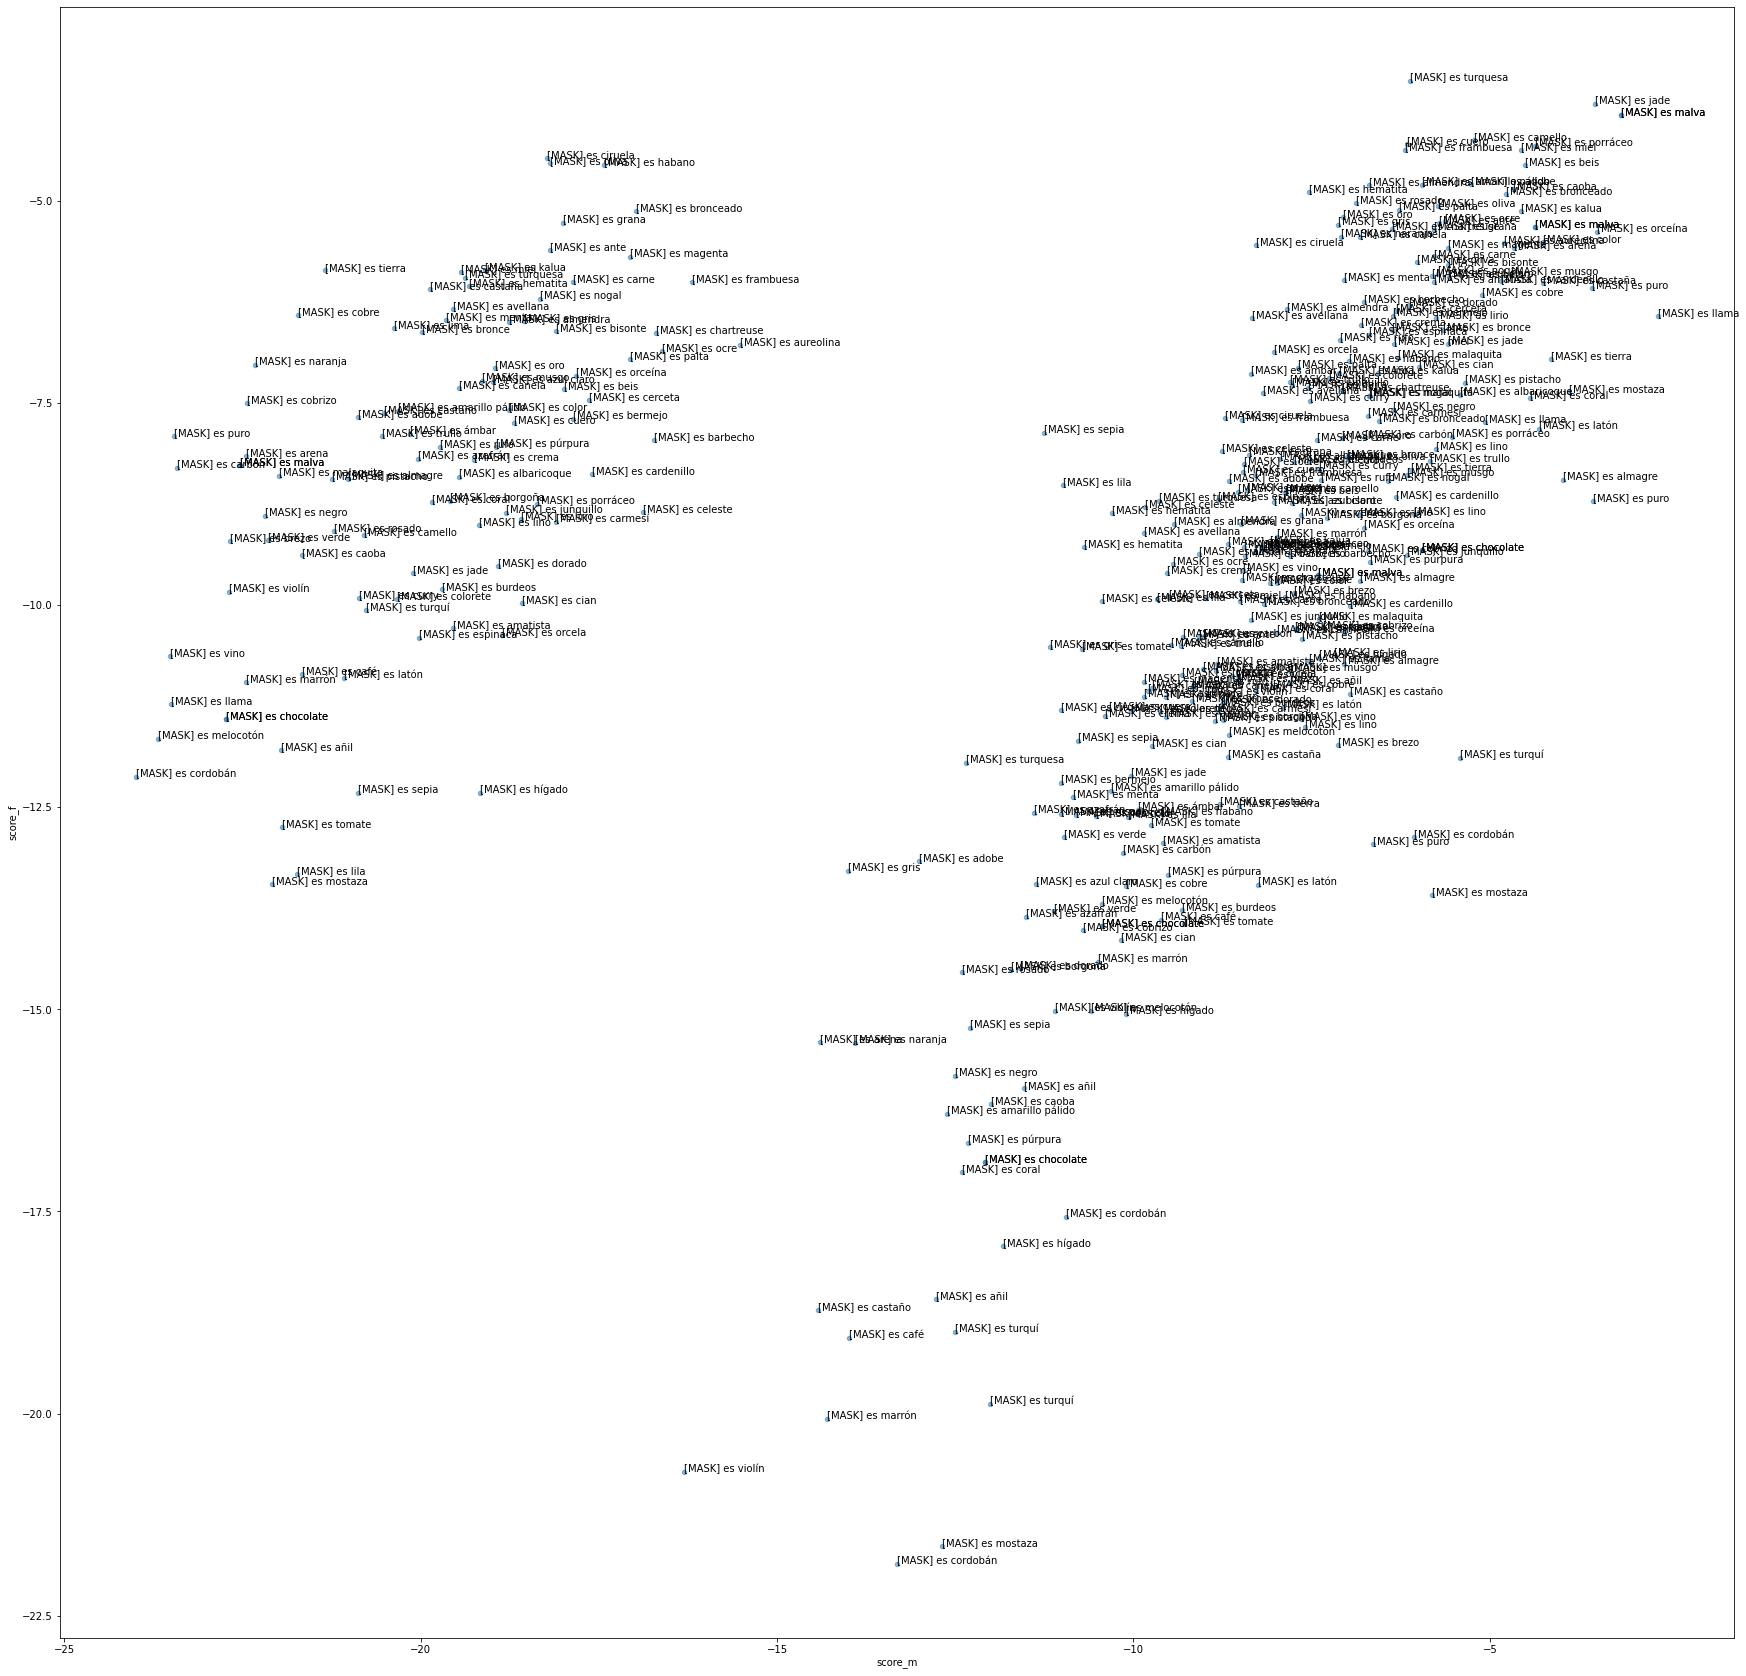

In [7]:
ax = df.plot.scatter(x='score_m', y='score_f', alpha=0.5)
for i, txt in enumerate(df["masked_sentence_m"]):
    ax.annotate(txt, (df["score_m"].iat[i],df["score_f"].iat[i]))
plt.show()   


In [83]:

def read(path):
    return pd.read_excel('../' + path)

def show_scatter(df, labels):
    ax = df.plot.scatter(x='score_m', y='score_f', alpha=1)
    
    if labels: 
        for i, txt in enumerate(df["target_value_m"]):
            ax.annotate(txt, (df["score_m"].iat[i],df["score_f"].iat[i]))
        
    plt.show()

    
def normalize(df):
    result = df.copy()
    df_num = df.select_dtypes(include=[np.number])
    for feature_name in df_num.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def plot_file(path, labels = False):
    
    df = read(path)
    show_scatter(df, labels)
    return df

def plot_file_norm(path, labels = False):
    df = read(path)
    dfn = normalize(df)
    show_scatter(dfn, labels)
    return dfn

TREE = 0.001

def plot_file_norm_filter(path, labels = False):
    df = read(path)
    dfn = df
    
    dfn = normalize(df)
    dfn = dfn[(dfn['score_m'] < TREE ) & (dfn['score_f'] < TREE)]

    show_scatter(dfn, labels)


# http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python
def plot_clusters(df):
    df = read(path)
    dfn = normalize(df)
    df_num = dfn.select_dtypes(include=[np.number])

    cluster(df_num)

def plot_clusters_fixed(path):
    df = read(path)
    dfn = normalize(df)
    df_num = dfn.select_dtypes(include=[np.number])

    fixed_clusters(df_num)

def cluster(df_escalado):
    nc = range(1, 30) # El número de iteraciones que queremos hacer.
    kmeans = [KMeans(n_clusters=i) for i in nc]
    score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
    score
    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Suma de los errores cuadráticos')
    plt.plot(nc,score)
    print(nc, score)
    
def fixed_clusters(df_escalado, qty = 2):
    #%% Curva elbow para determinar valor óptimo de k.
    kmeans = KMeans(n_clusters=qty).fit(df_escalado)
    centroids = kmeans.cluster_centers_
    print(centroids)
    score = kmeans.score(df_escalado)

    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Suma de los errores cuadráticos')
    print(qty,score)
    

def draw_cluster(df_escalado):
    colores=['red','green','blue','yellow','fuchsia']
    asignar=[]
    for row in labels:
        asignar.append(colores[row])
        plt.scatter(x, y, c=asignar, s=1)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
        plt.xlabel('score_m')
        plt.ylabel('score_f')
        plt.title('k-means clustering')
        plt.show()

def plot_all(path, labels = False):
    plot_file(path, labels)
    dfn = plot_file_norm(path, labels)
    plot_clusters(path)
    plot_clusters_fixed(path)
    return dfn


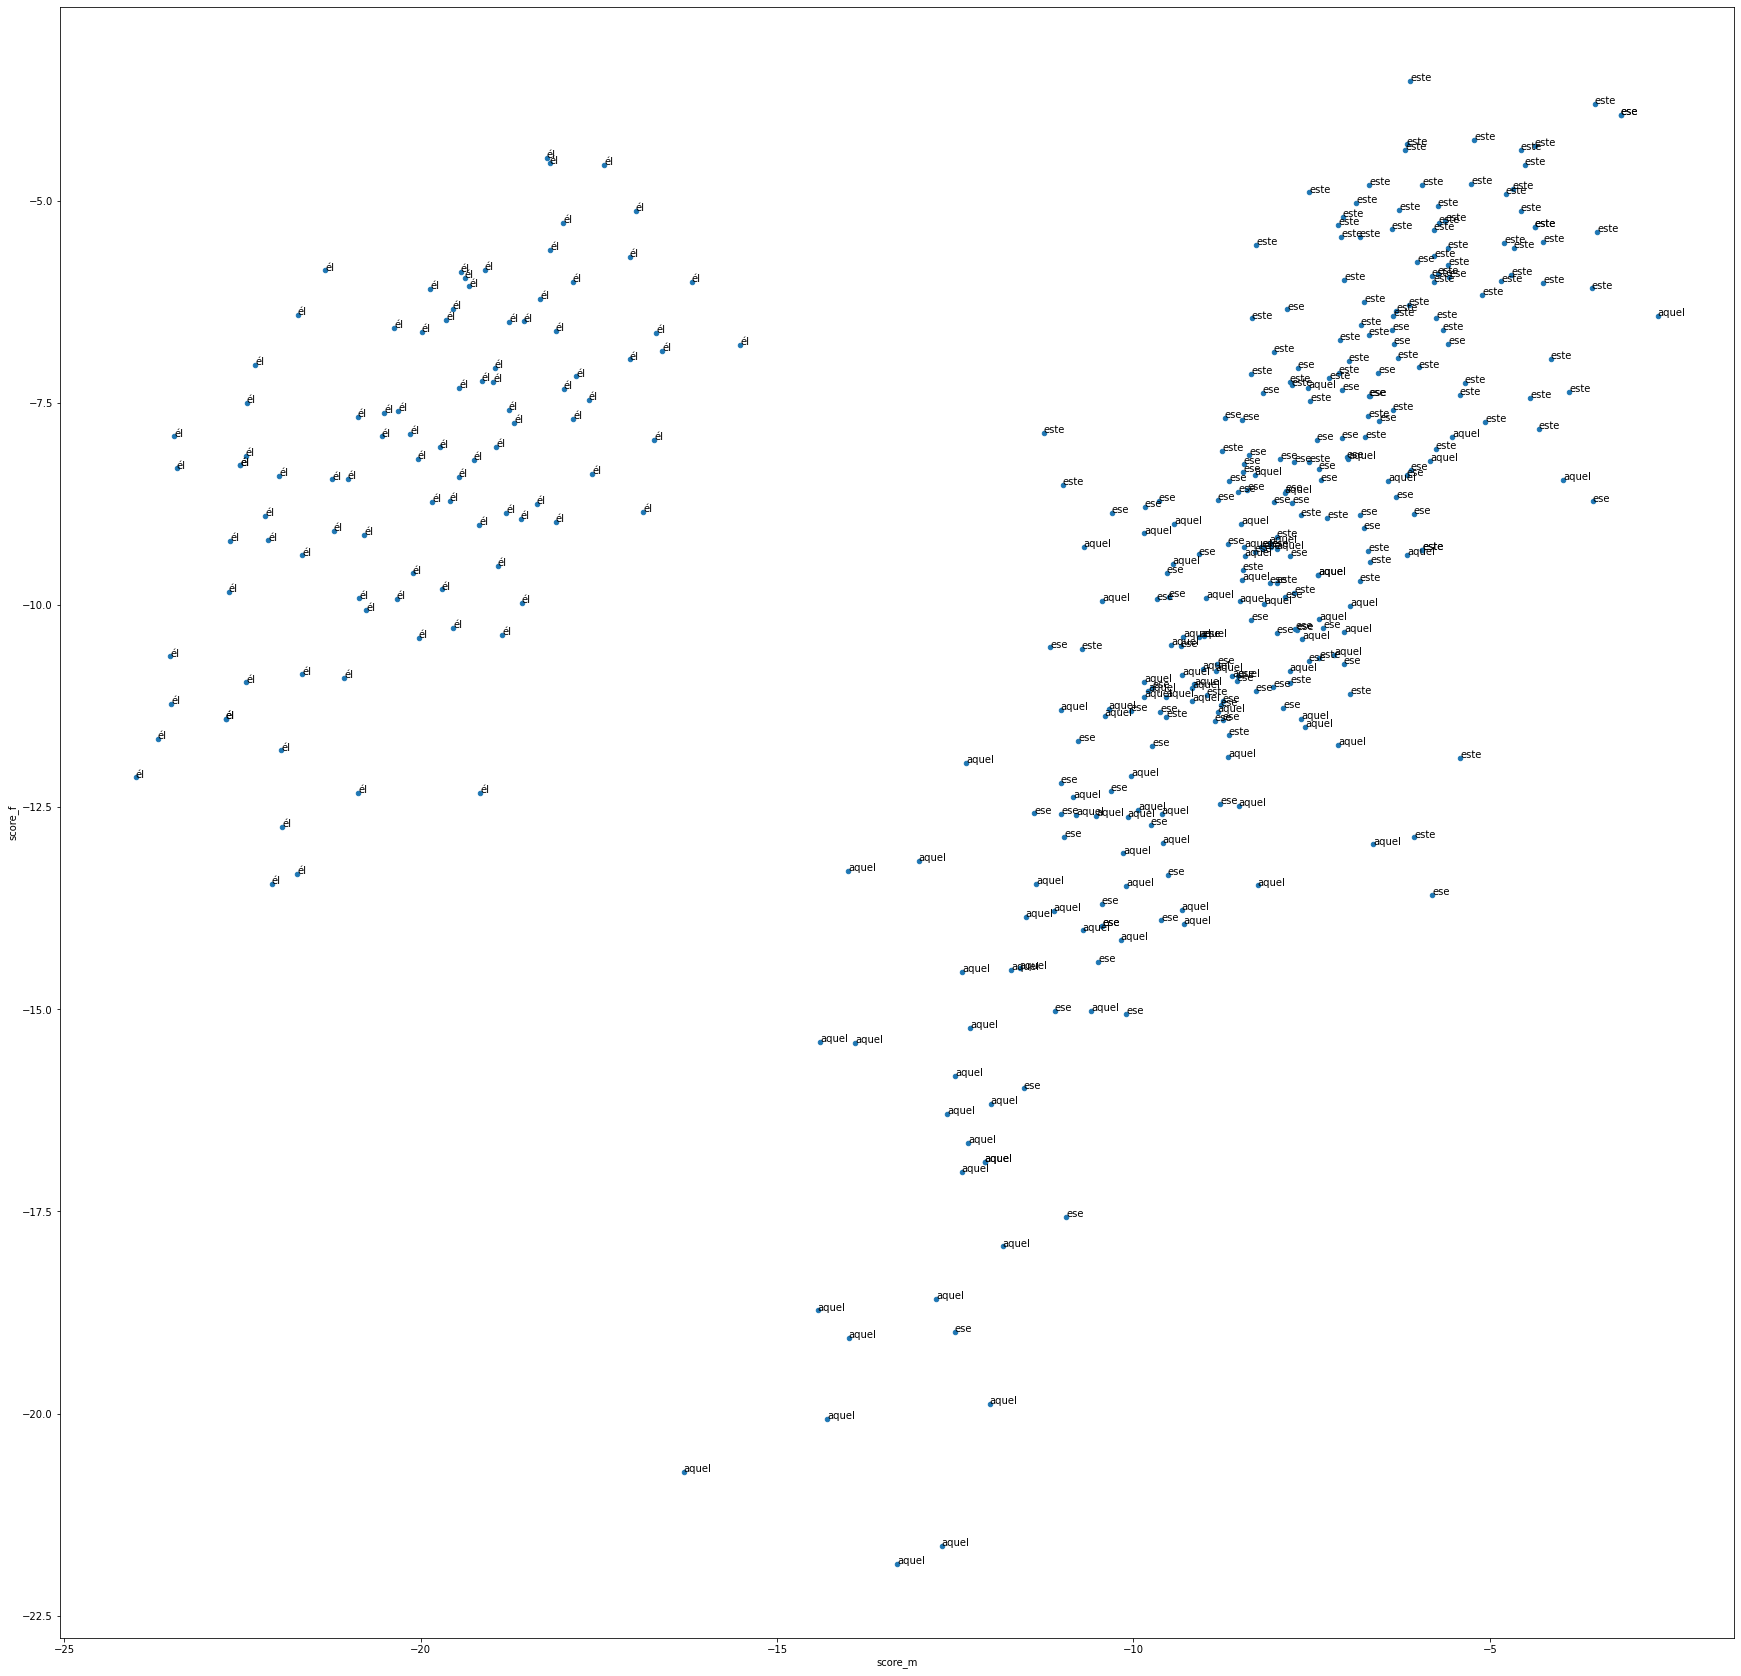

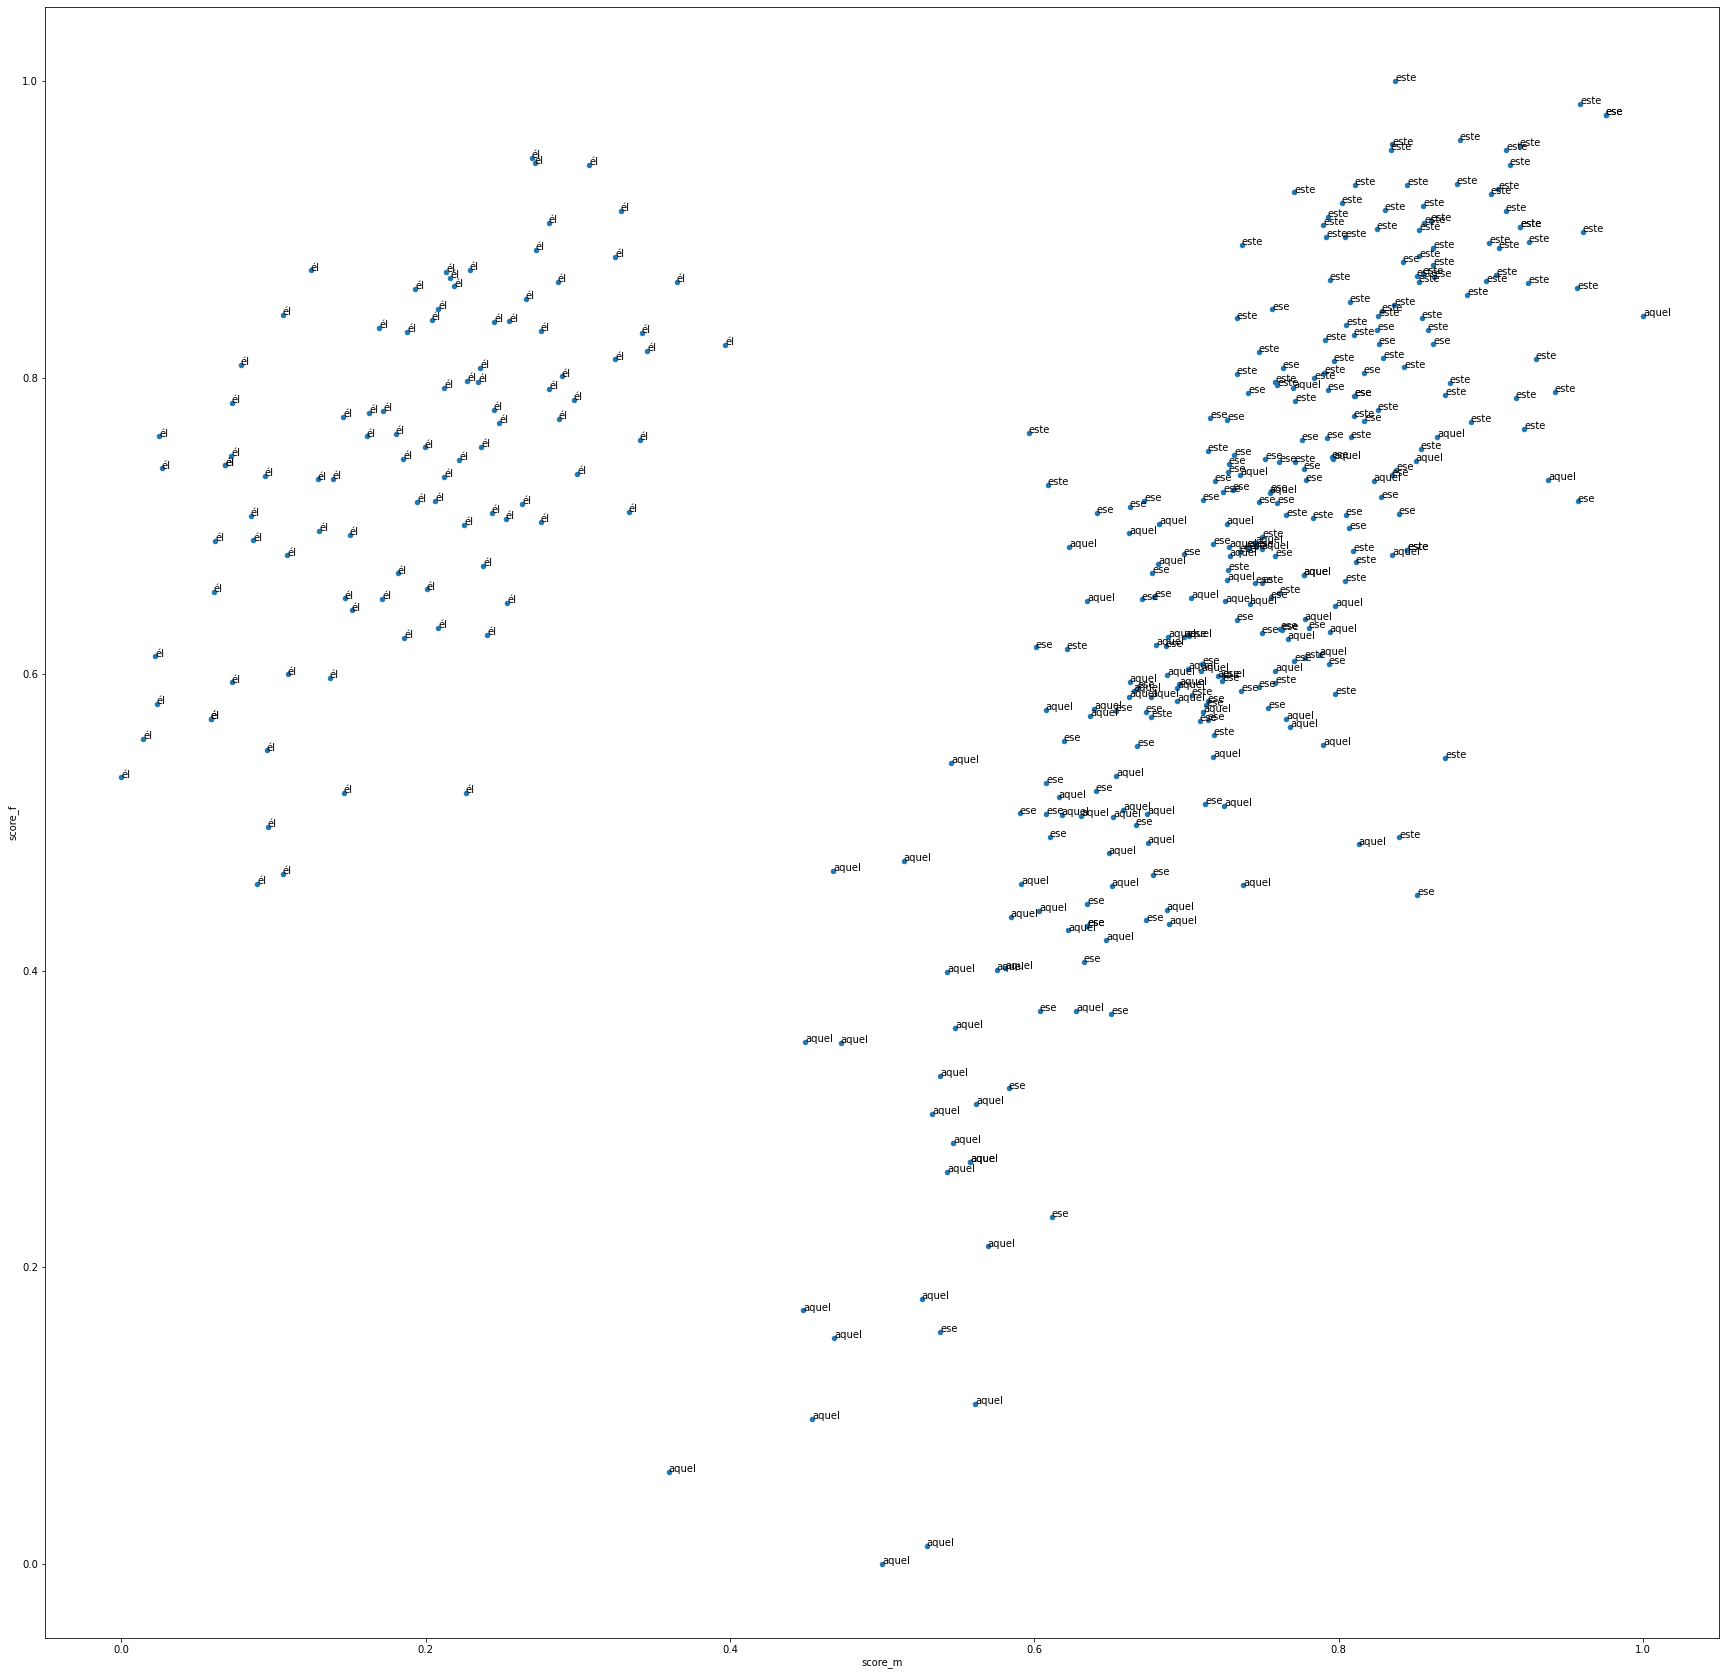

range(1, 30) [-107.0068893038536, -46.057166669361855, -20.318161590166714, -14.467101557784012, -11.567564483328038, -10.412206009450998, -9.216843011200835, -8.25323909482372, -7.504285312426465, -6.997492323003364, -6.481889442836972, -5.923915598409459, -5.491357494951669, -5.166814310196946, -4.9436039052524015, -4.703746122641708, -4.419227630606068, -4.226258526757924, -4.034905724620937, -3.9277969792474563, -3.664509537416152, -3.605242403029735, -3.4539841257216053, -3.331918730923314, -3.1609487866645383, -3.044012235032375, -3.0295945691291375, -2.9683883709138694, -2.8469022739748207]
[[0.62531328 0.62531328 0.74128809 0.65968304]
 [0.12406015 0.12406015 0.18997609 0.73847798]]
2 -46.057166669361855


Unnamed: 0    type  test_uid   score_m   score_f  \
0      0.000000  simple  0.000000  0.145824  0.773771   
1      0.002506  simple  0.002506  0.212163  0.732887   
2      0.005013  simple  0.005013  0.139092  0.731723   
3      0.007519  simple  0.007519  0.245173  0.837724   
4      0.010025  simple  0.010025  0.172326  0.777531   
..          ...     ...       ...       ...       ...   
395    0.989975  simple  0.989975  0.545409  0.540183   
396    0.992481  simple  0.992481  0.560993  0.107620   
397    0.994987  simple  0.994987  0.603024  0.440517   
398    0.997494  simple  0.997494  0.765489  0.569837   
399    1.000000  simple  1.000000  0.359828  0.062036   

             masked_sentence_m      masked_sentence_f target_value_m  \
0              [MASK] es adobe        [MASK] es adobe             él   
1        [MASK] es albaricoque  [MASK] es albaricoque             él   
2            [MASK] es almagre      [MASK] es almagre             él   
3           [MASK] es almendra     [MASK] es almendra             él   
4    [MASK] es amarillo pálido     [MASK] es amarillo             él   
..                         ...                    ...            ...   
395         [MASK] es turquesa     [MASK] es turquesa          aquel   
396           [MASK] es turquí       [MASK] es turquí          aquel   
397            [MASK] es verde        [MASK] es verde          aquel   
398             [MASK] es vino         [MASK] es vino          aquel   
399           [MASK] es violín       [MASK] es violín          aquel   

    target_value_f  
0             ella  
1             ella  
2             ella  
3             ella  
4             ella  
..             ...  
395        aquella  
396        aquella  
397        aquella  
398        aquella  
399        aquella  

[400 rows x 9 columns]

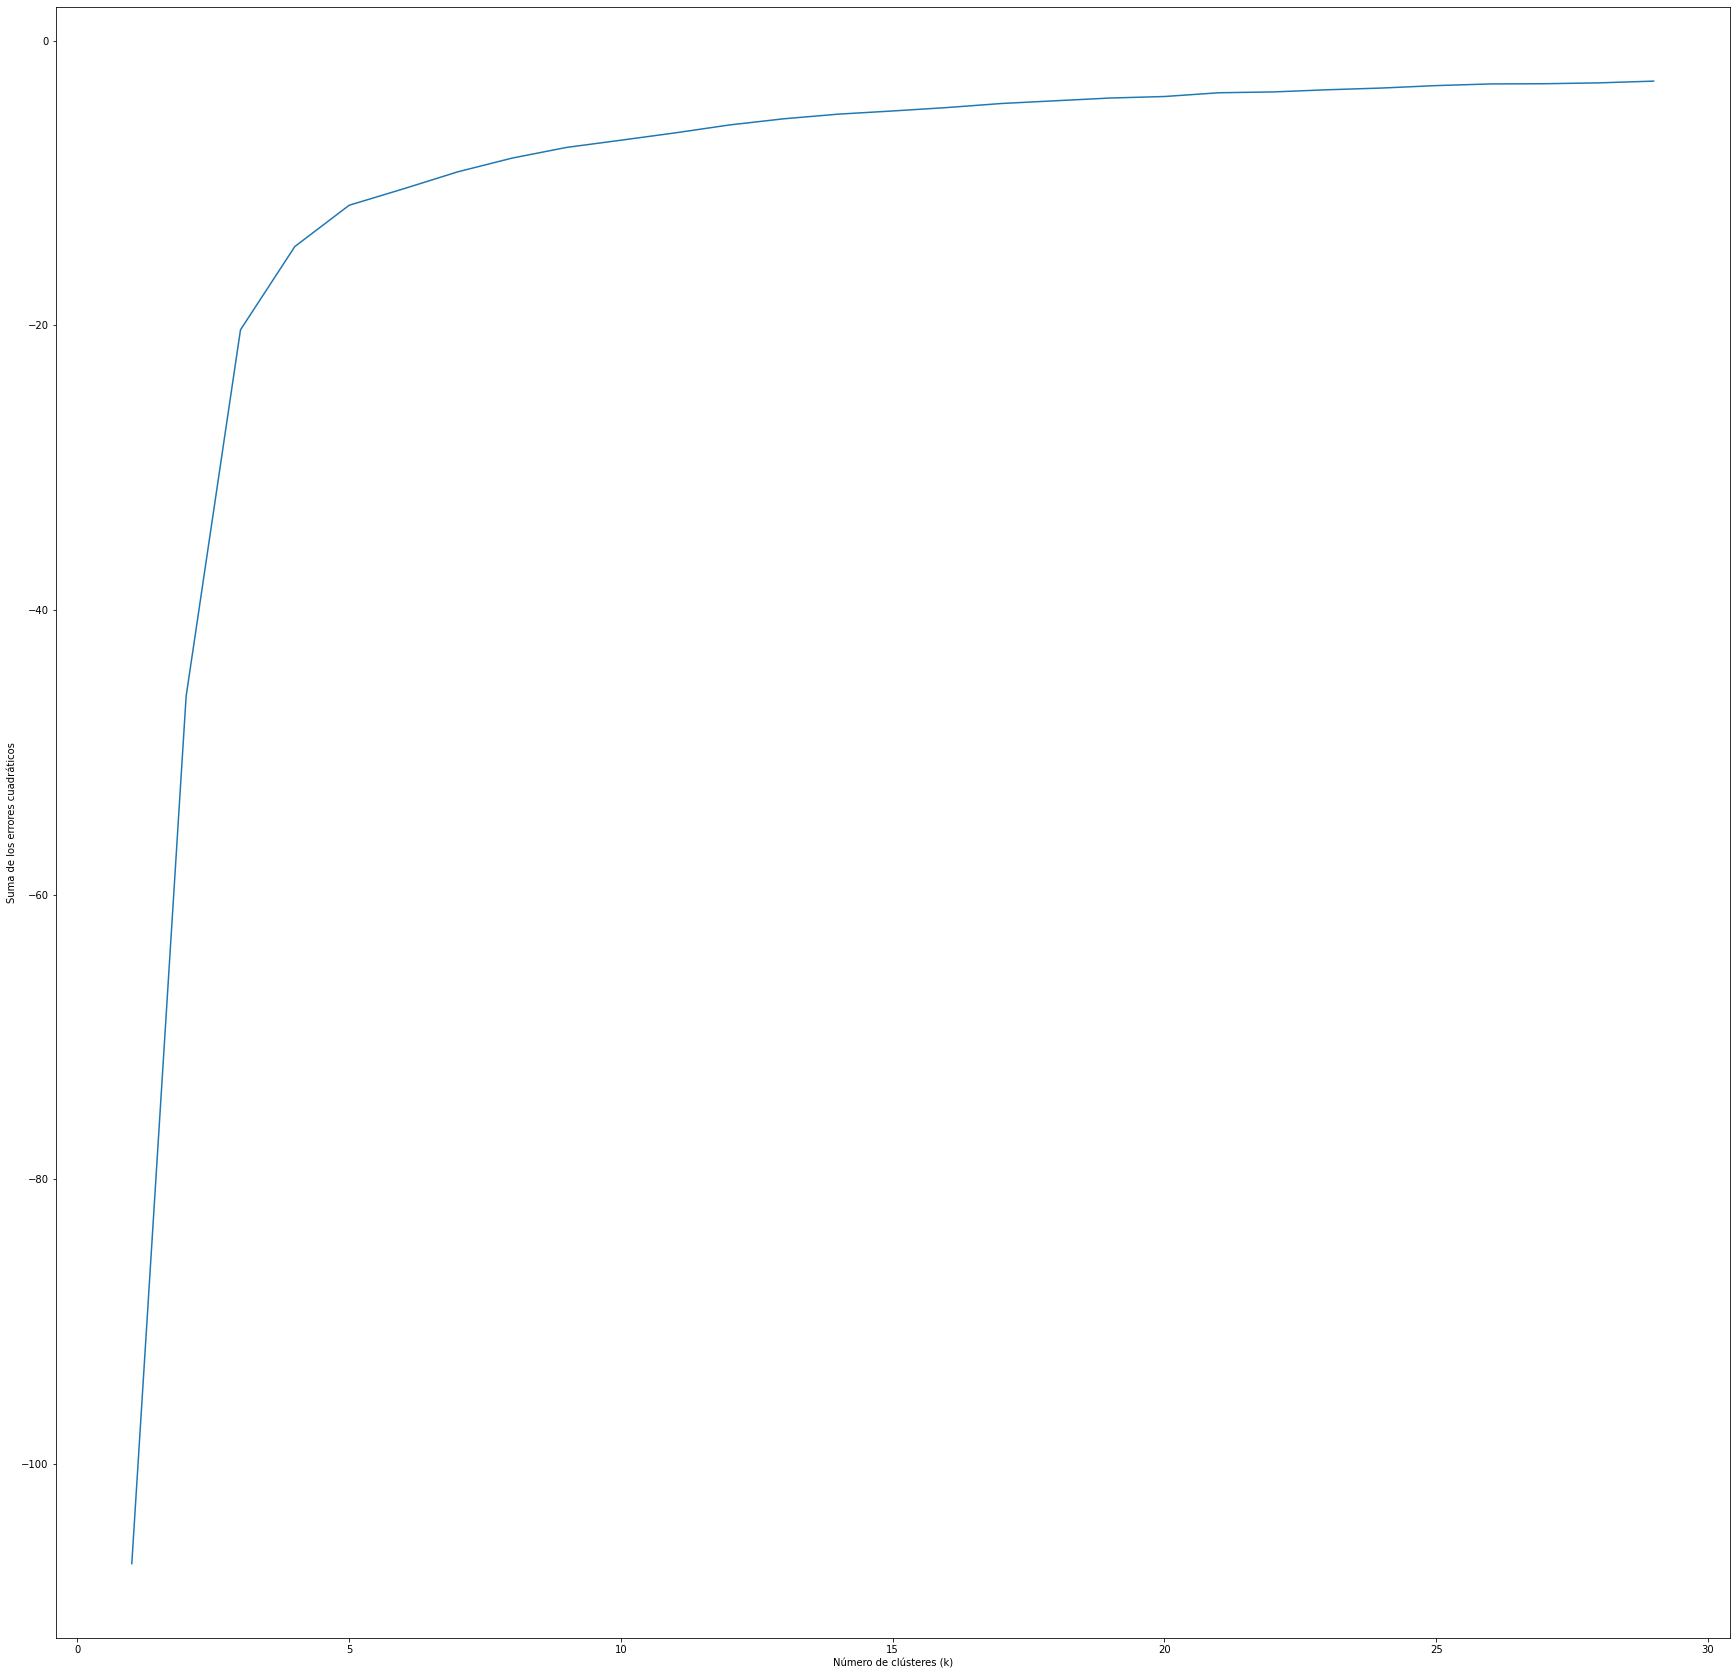

In [84]:
plot_all('results/Auto/genero-m1_es_adjetivocolores-m2.xlsx', True)

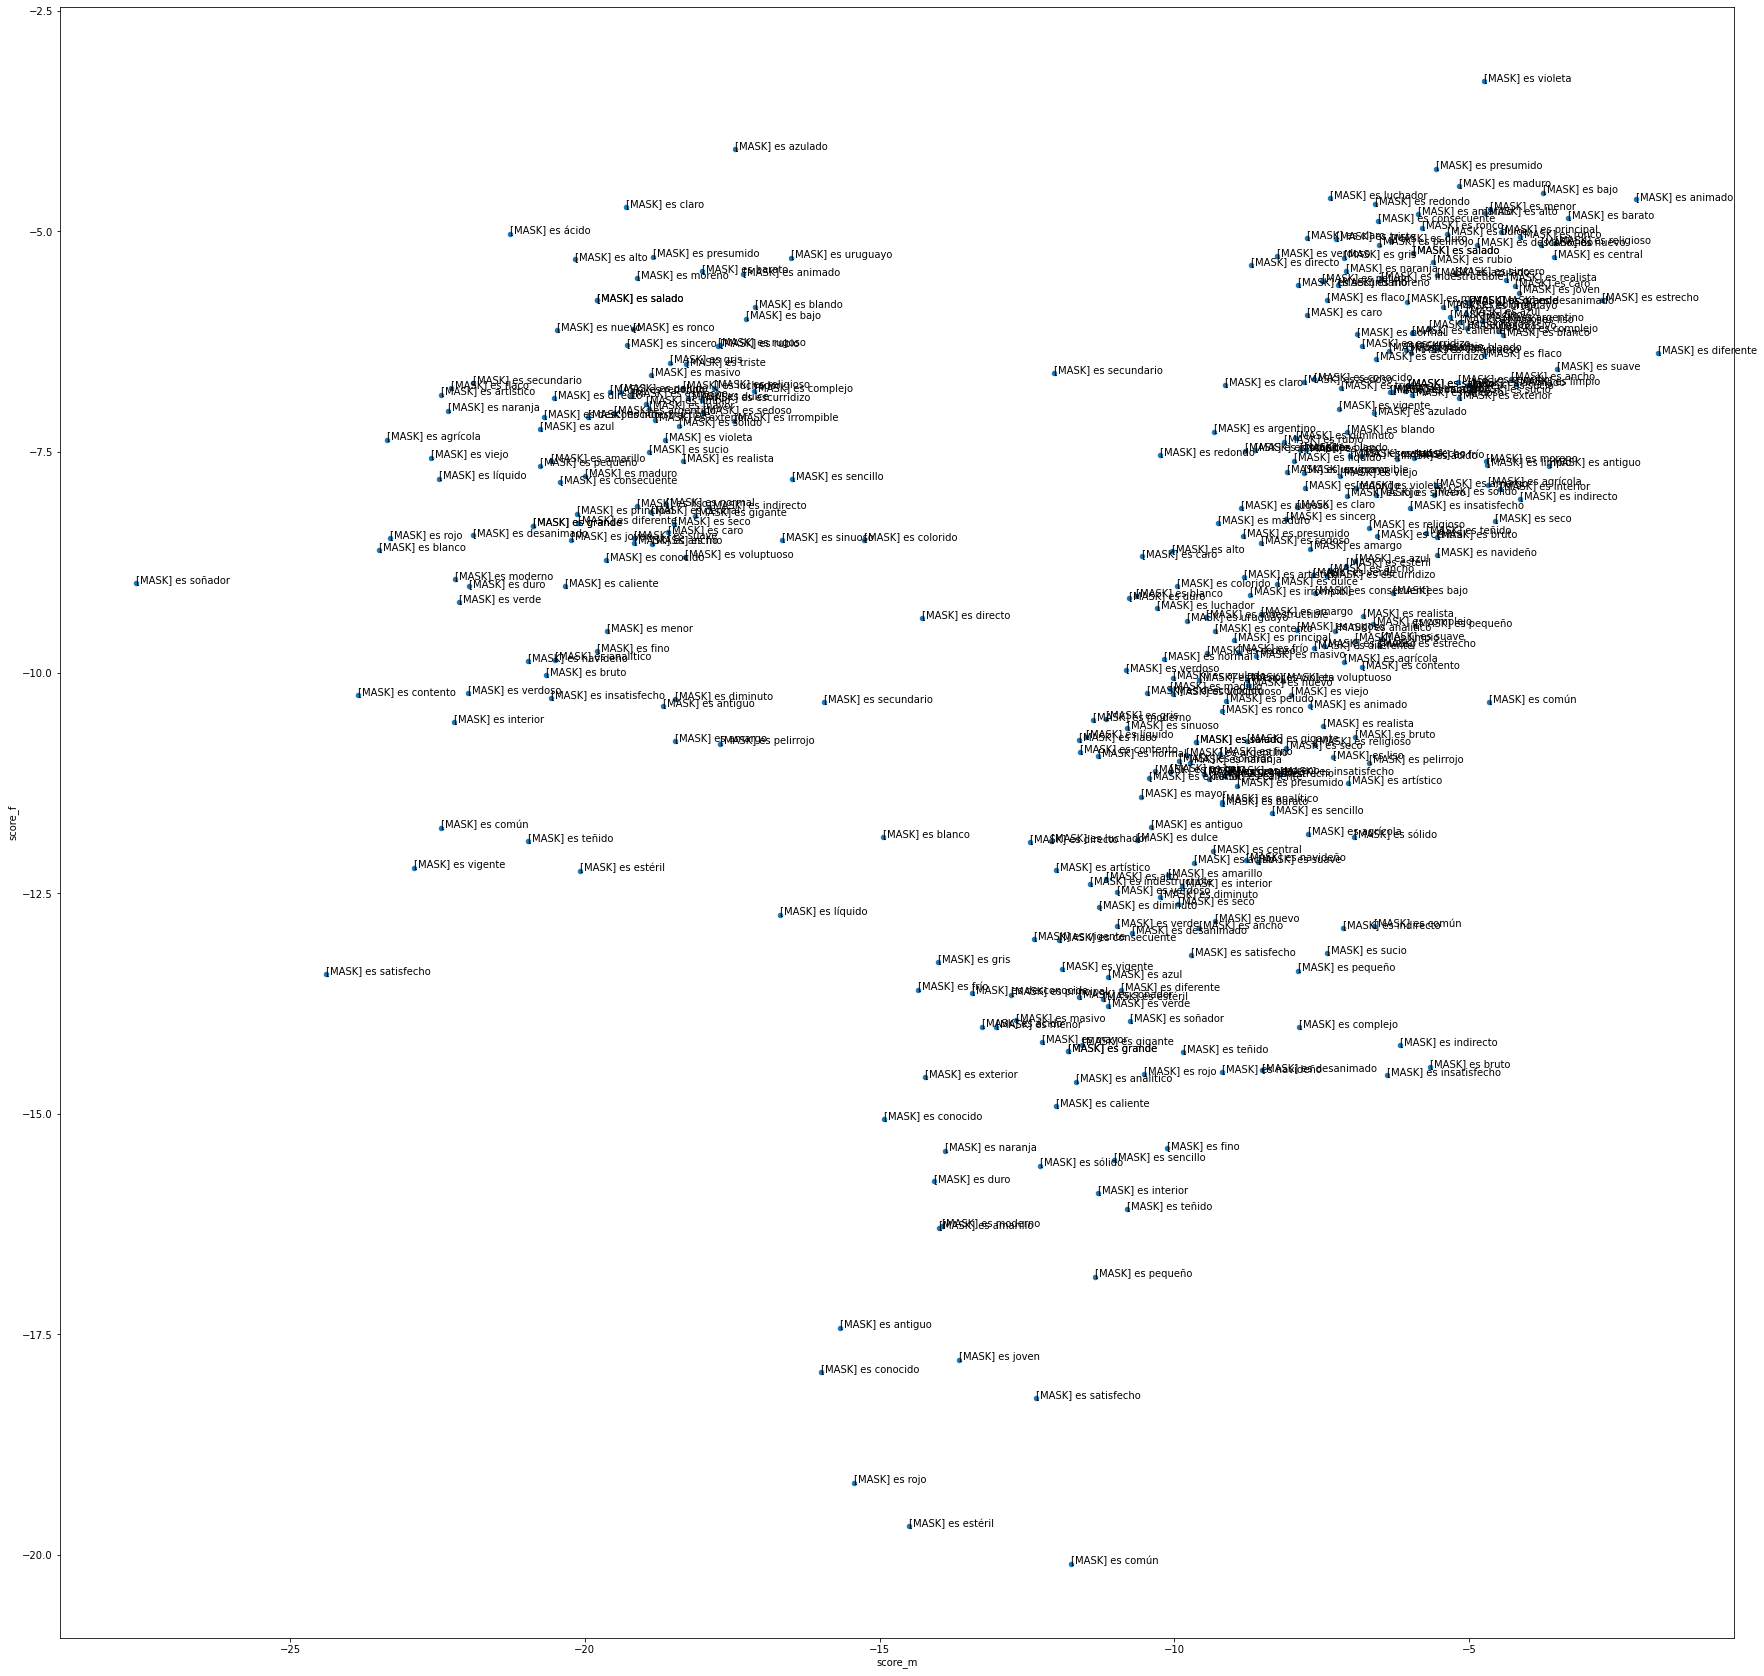

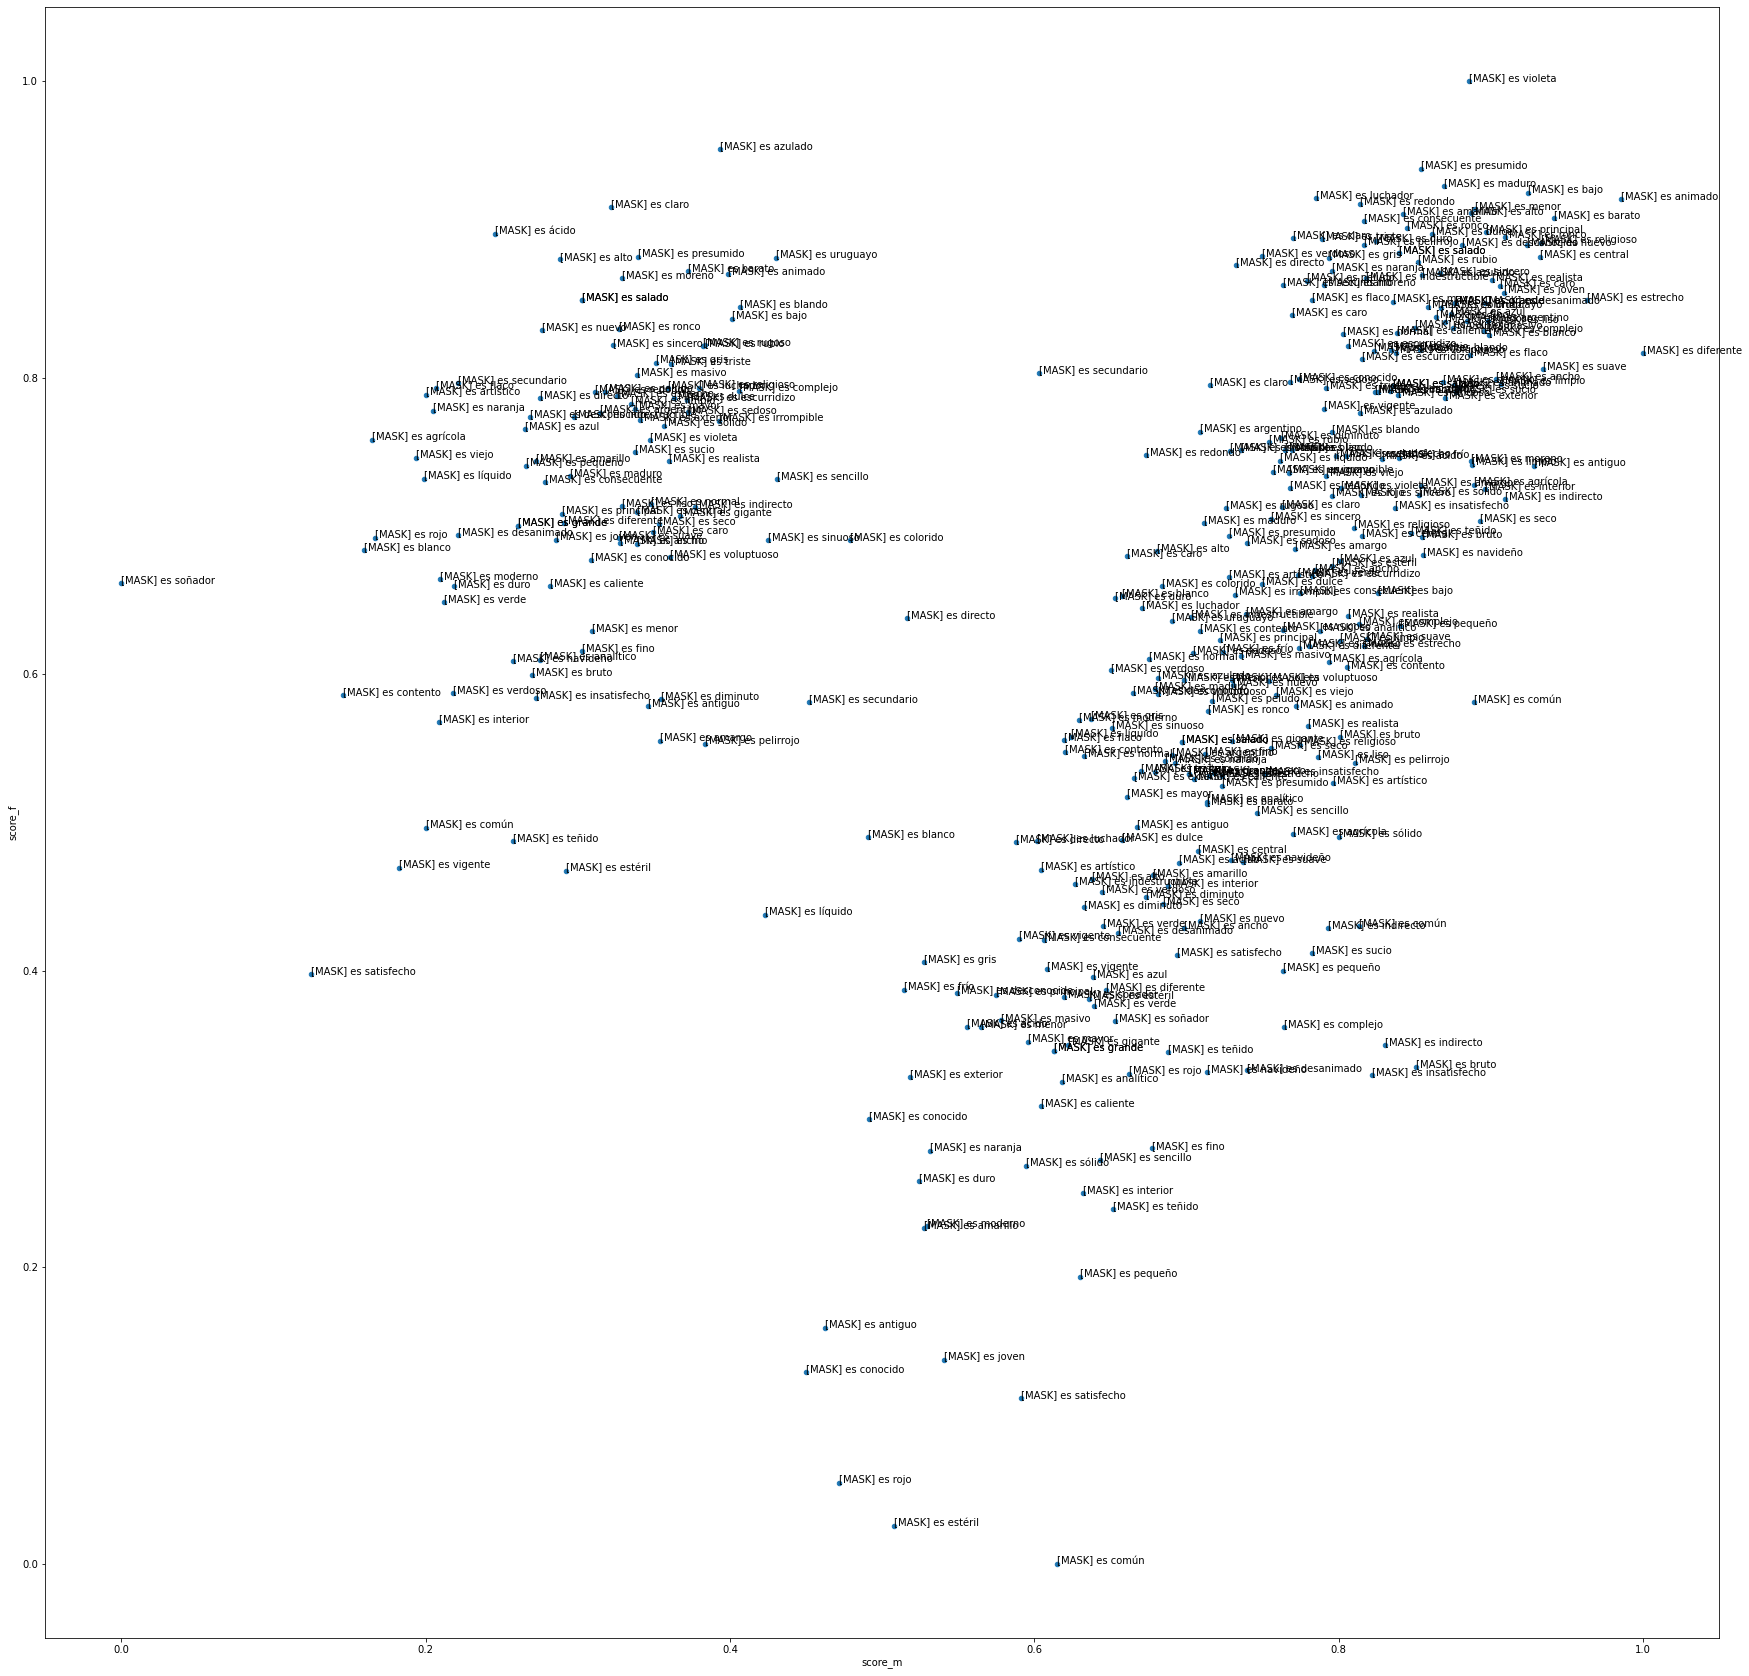

range(1, 30) [-100.11003300458556, -42.47885186805908, -19.01002768258287, -12.844759999147305, -10.857940766463912, -9.440689235727978, -8.566101000640336, -7.792225741177058, -7.096249271205358, -6.5328567275754015, -5.993569053102892, -5.568786371183203, -5.332125153469425, -4.912902305388374, -4.792789798039273, -4.535410575171468, -4.391465081716408, -4.16271937530135, -4.09095544443048, -3.919994787934699, -3.7623082030574815, -3.6014837387137644, -3.4665754982733636, -3.3905112243484665, -3.2729303764843025, -3.2616170822139, -3.08208866517282, -3.00883792976752, -2.8929727321455703]
[[0.24704438 0.24704438 0.57226054 0.77371645]
 [0.7479466  0.7479466  0.69980364 0.53227052]]
2 -42.47885186805908


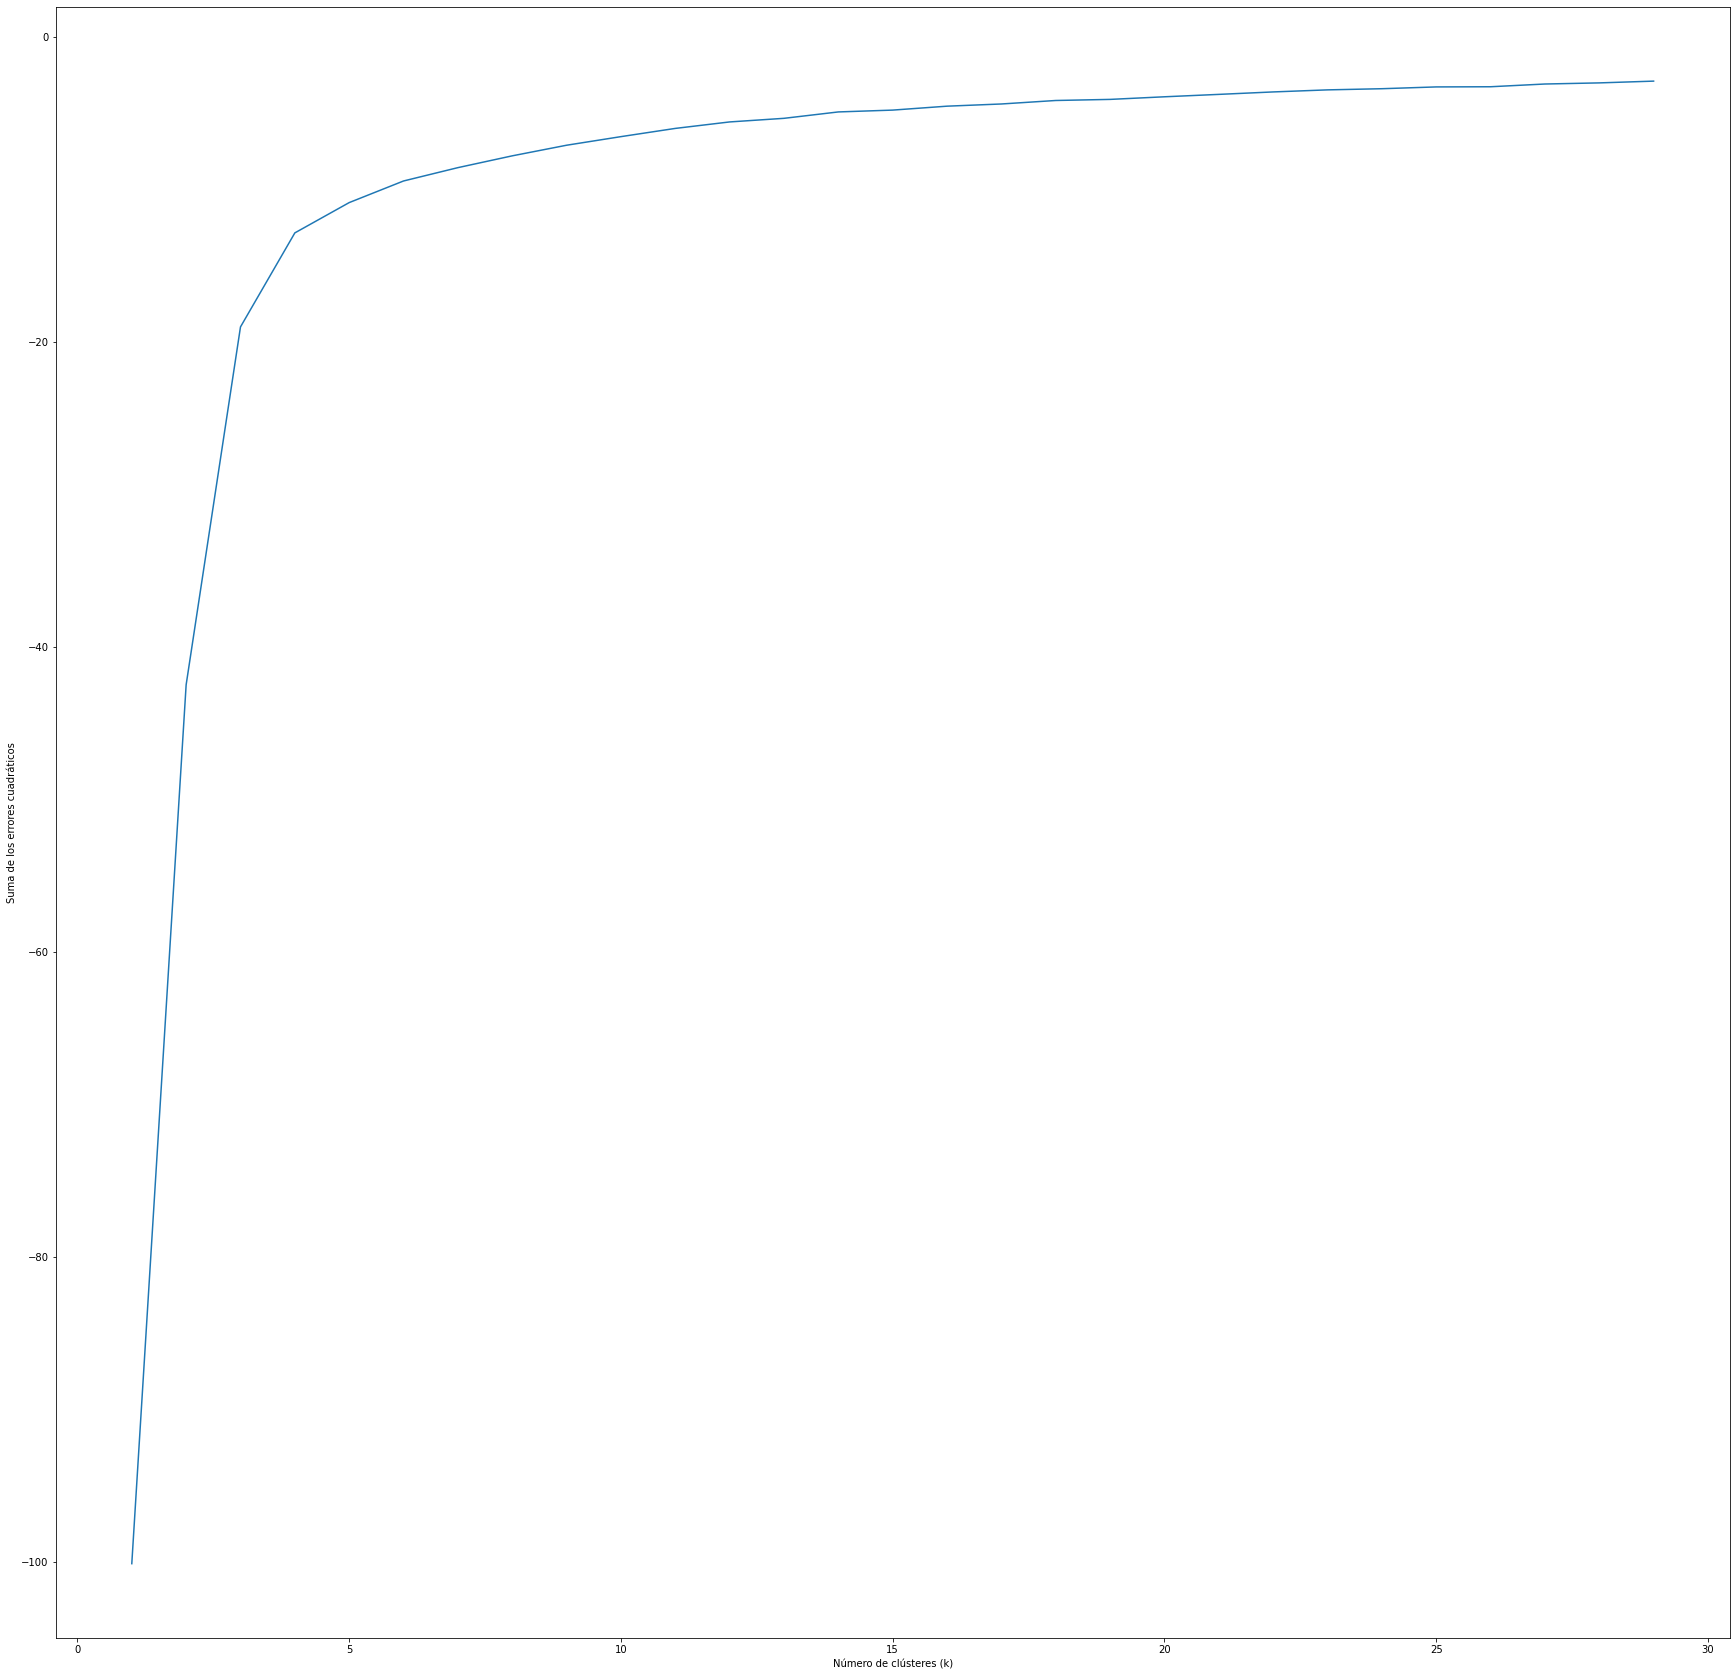

In [29]:
plot_all('results/Auto/genero-m1_es_adjetivootros-m2.xlsx', True)

In [ ]:
plot_all('results/Auto/genero-m1_es_adjetivopositivo-m2.xlsx', True)


In [ ]:
plot_all('results/Auto/genero-m1_es_adjetivonegativo-m2.xlsx', True)


In [ ]:
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivocolores-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivootros-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivopositivo-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivonegativo-m2.xlsx')

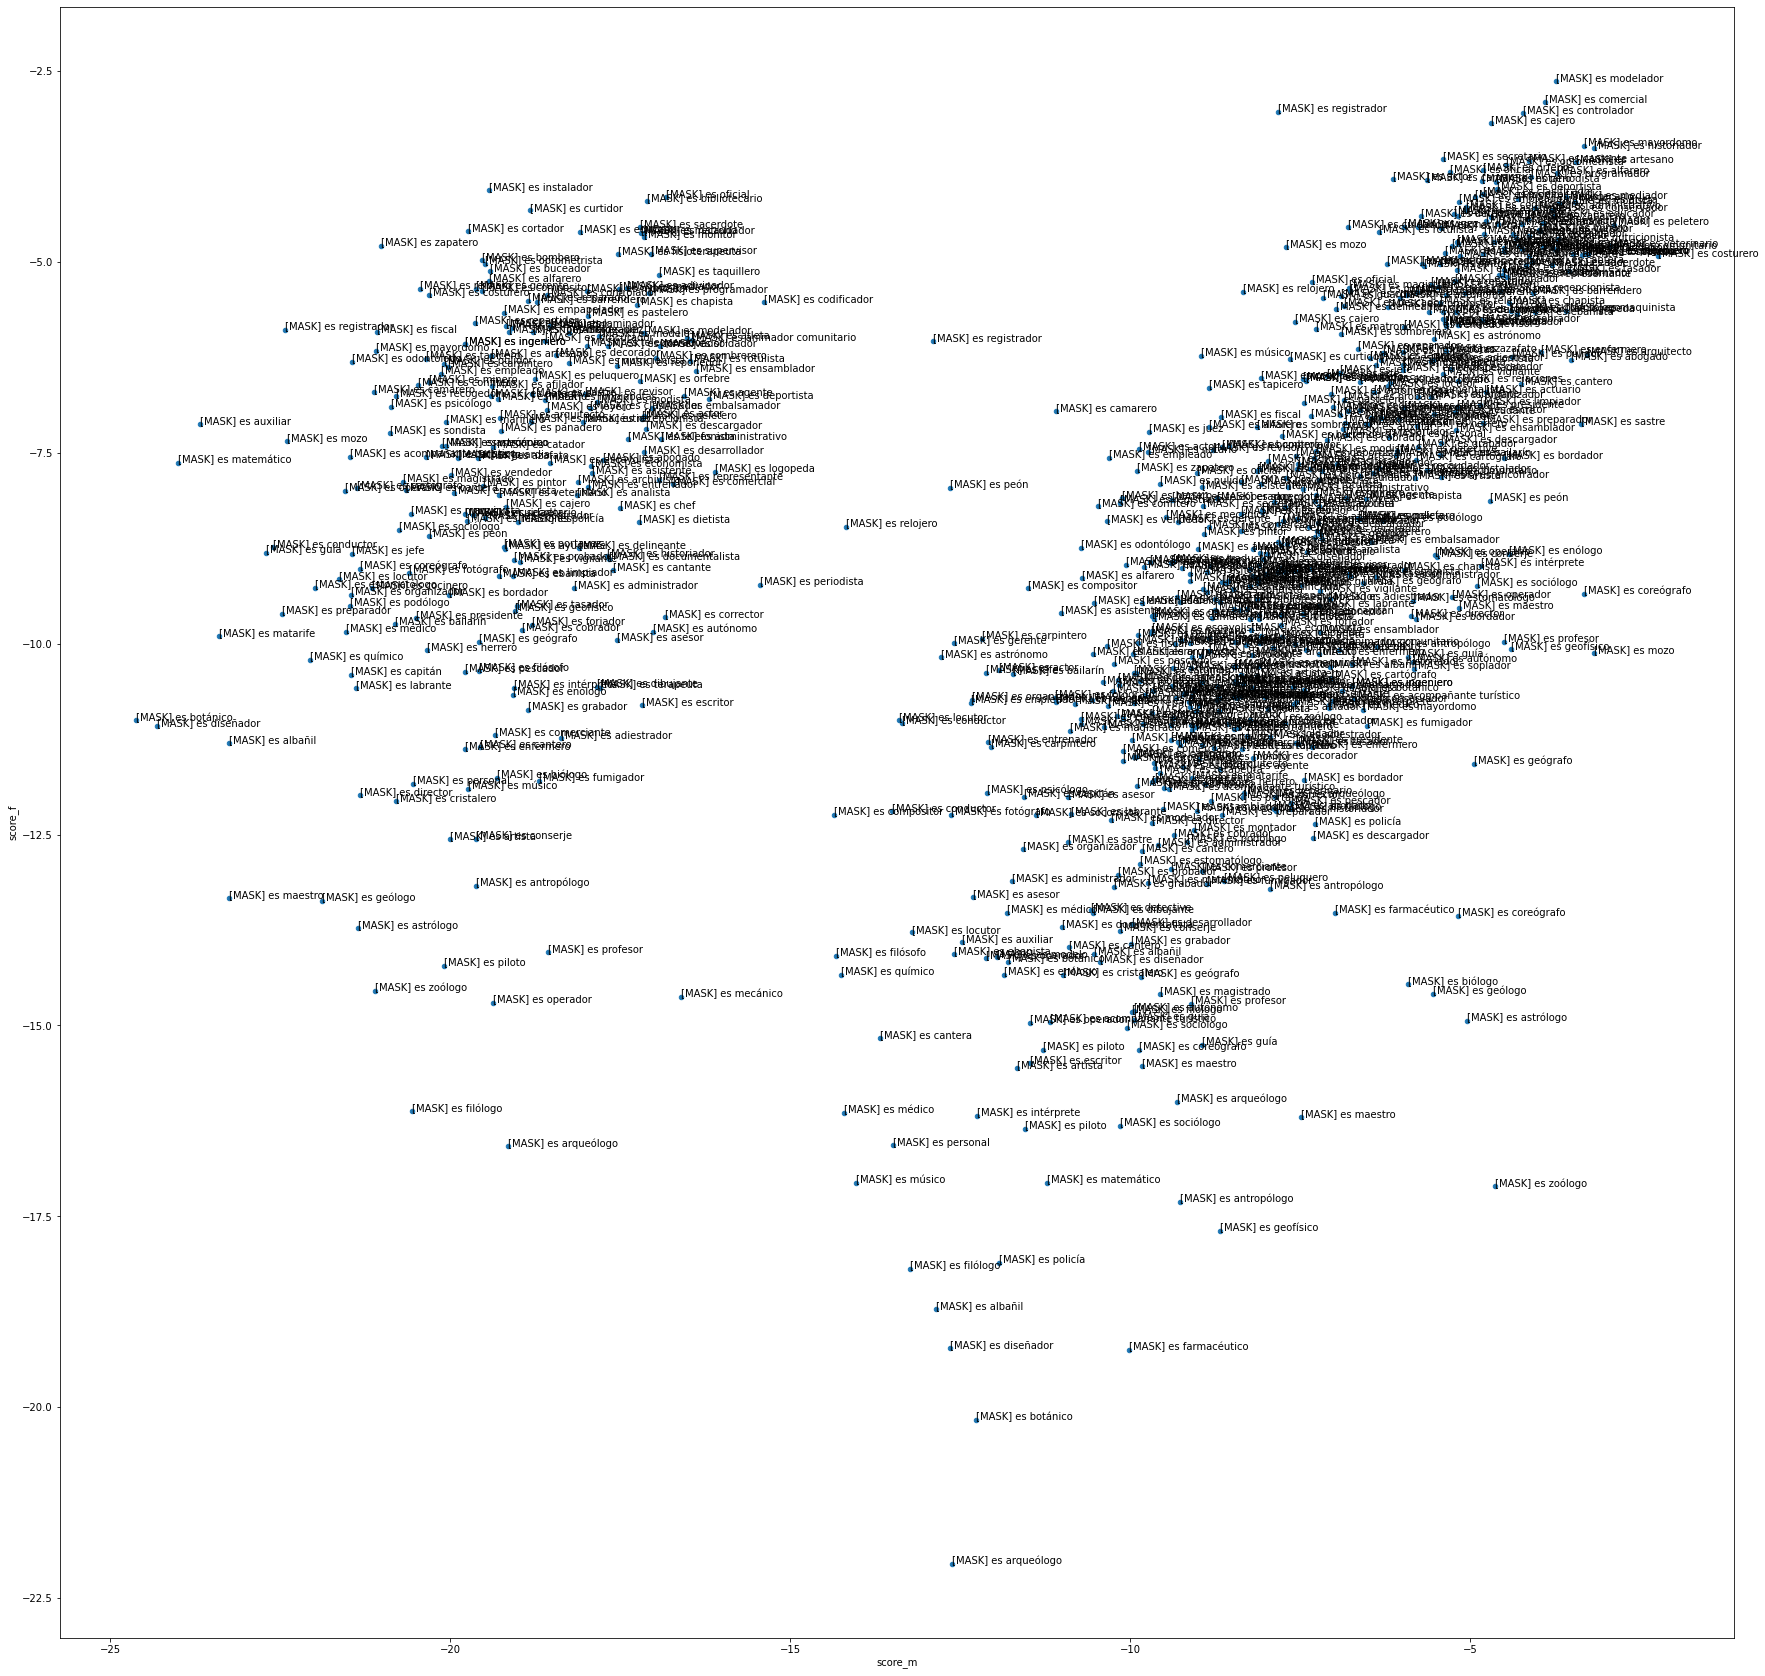

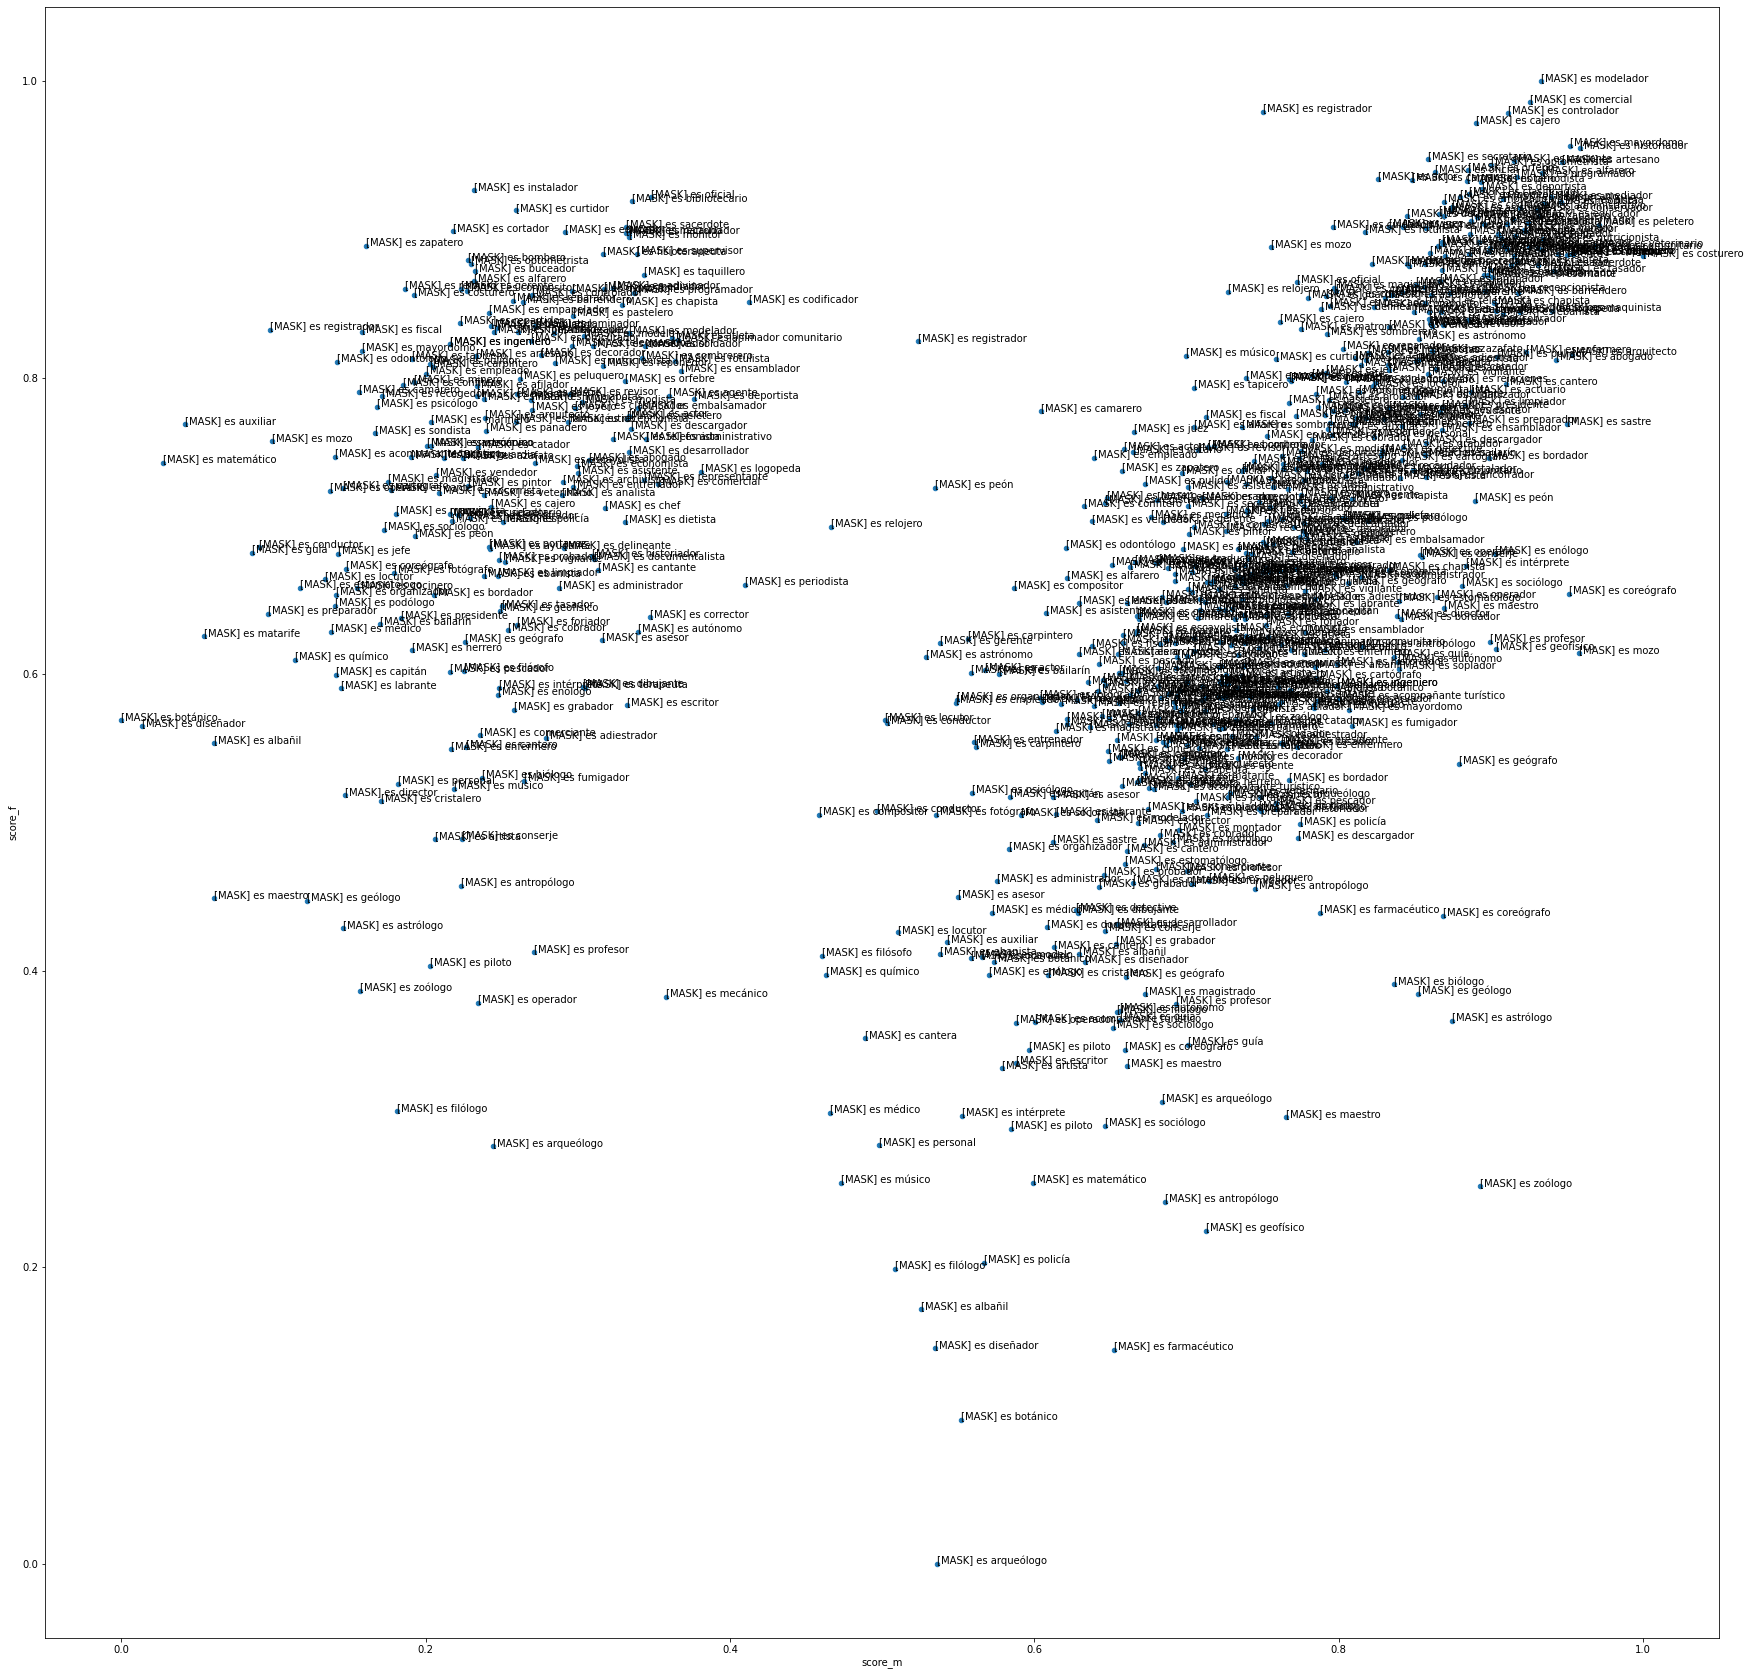

range(1, 30) [-209.8567120775025, -90.31056089897224, -36.74721461317029, -24.829098341632488, -21.891133324678194, -19.55658422332358, -17.304489925423848, -15.618381777859174, -14.295289630423477, -13.092592804010623, -11.992593010324985, -10.821538681115905, -10.363470271694709, -9.916006029822011, -9.48123104241894, -9.259156442781638, -8.947873421730753, -8.544900400288713, -8.304902330647666, -8.140547368727516, -7.804754323450823, -7.527238670092656, -7.398842733120938, -7.16199828783824, -6.884743383190082, -6.638578043804859, -6.50784978023216, -6.372826545418463, -6.274278184401455]
[[0.62515042 0.62515042 0.75140624 0.66766964]
 [0.12454874 0.12454874 0.23954684 0.72350286]]
2 -90.31056089897224


Unnamed: 0    type  test_uid   score_m   score_f  \
0      0.000000  simple  0.000000  0.307221  0.744169   
1      0.001203  simple  0.001203  0.140793  0.746428   
2      0.002407  simple  0.002407  0.333897  0.774460   
3      0.003610  simple  0.003610  0.190361  0.746290   
4      0.004813  simple  0.004813  0.279361  0.556734   
..          ...     ...       ...       ...       ...   
827    0.995187  simple  0.995187  0.691731  0.581165   
828    0.996390  simple  0.996390  0.728425  0.519838   
829    0.997593  simple  0.997593  0.778040  0.655833   
830    0.998797  simple  0.998797  0.693708  0.562075   
831    1.000000  simple  1.000000  0.892902  0.254440   

                   masked_sentence_m                masked_sentence_f  \
0                  [MASK] es abogado                [MASK] es abogada   
1    [MASK] es acompañante turístico  [MASK] es acompañante turístico   
2                    [MASK] es actor                 [MASK] es actriz   
3                 [MASK] es actuario               [MASK] es actuaria   
4              [MASK] es adiestrador           [MASK] es adiestradora   
..                               ...                              ...   
827               [MASK] es vendedor              [MASK] es vendedora   
828            [MASK] es veterinario            [MASK] es veterinaria   
829              [MASK] es vigilante              [MASK] es vigilante   
830               [MASK] es zapatero               [MASK] es zapatera   
831                [MASK] es zoólogo                [MASK] es zoóloga   

    target_value_m target_value_f  
0               él           ella  
1               él           ella  
2               él           ella  
3               él           ella  
4               él           ella  
..             ...            ...  
827          aquel        aquella  
828          aquel        aquella  
829          aquel        aquella  
830          aquel        aquella  
831          aquel        aquella  

[832 rows x 9 columns]

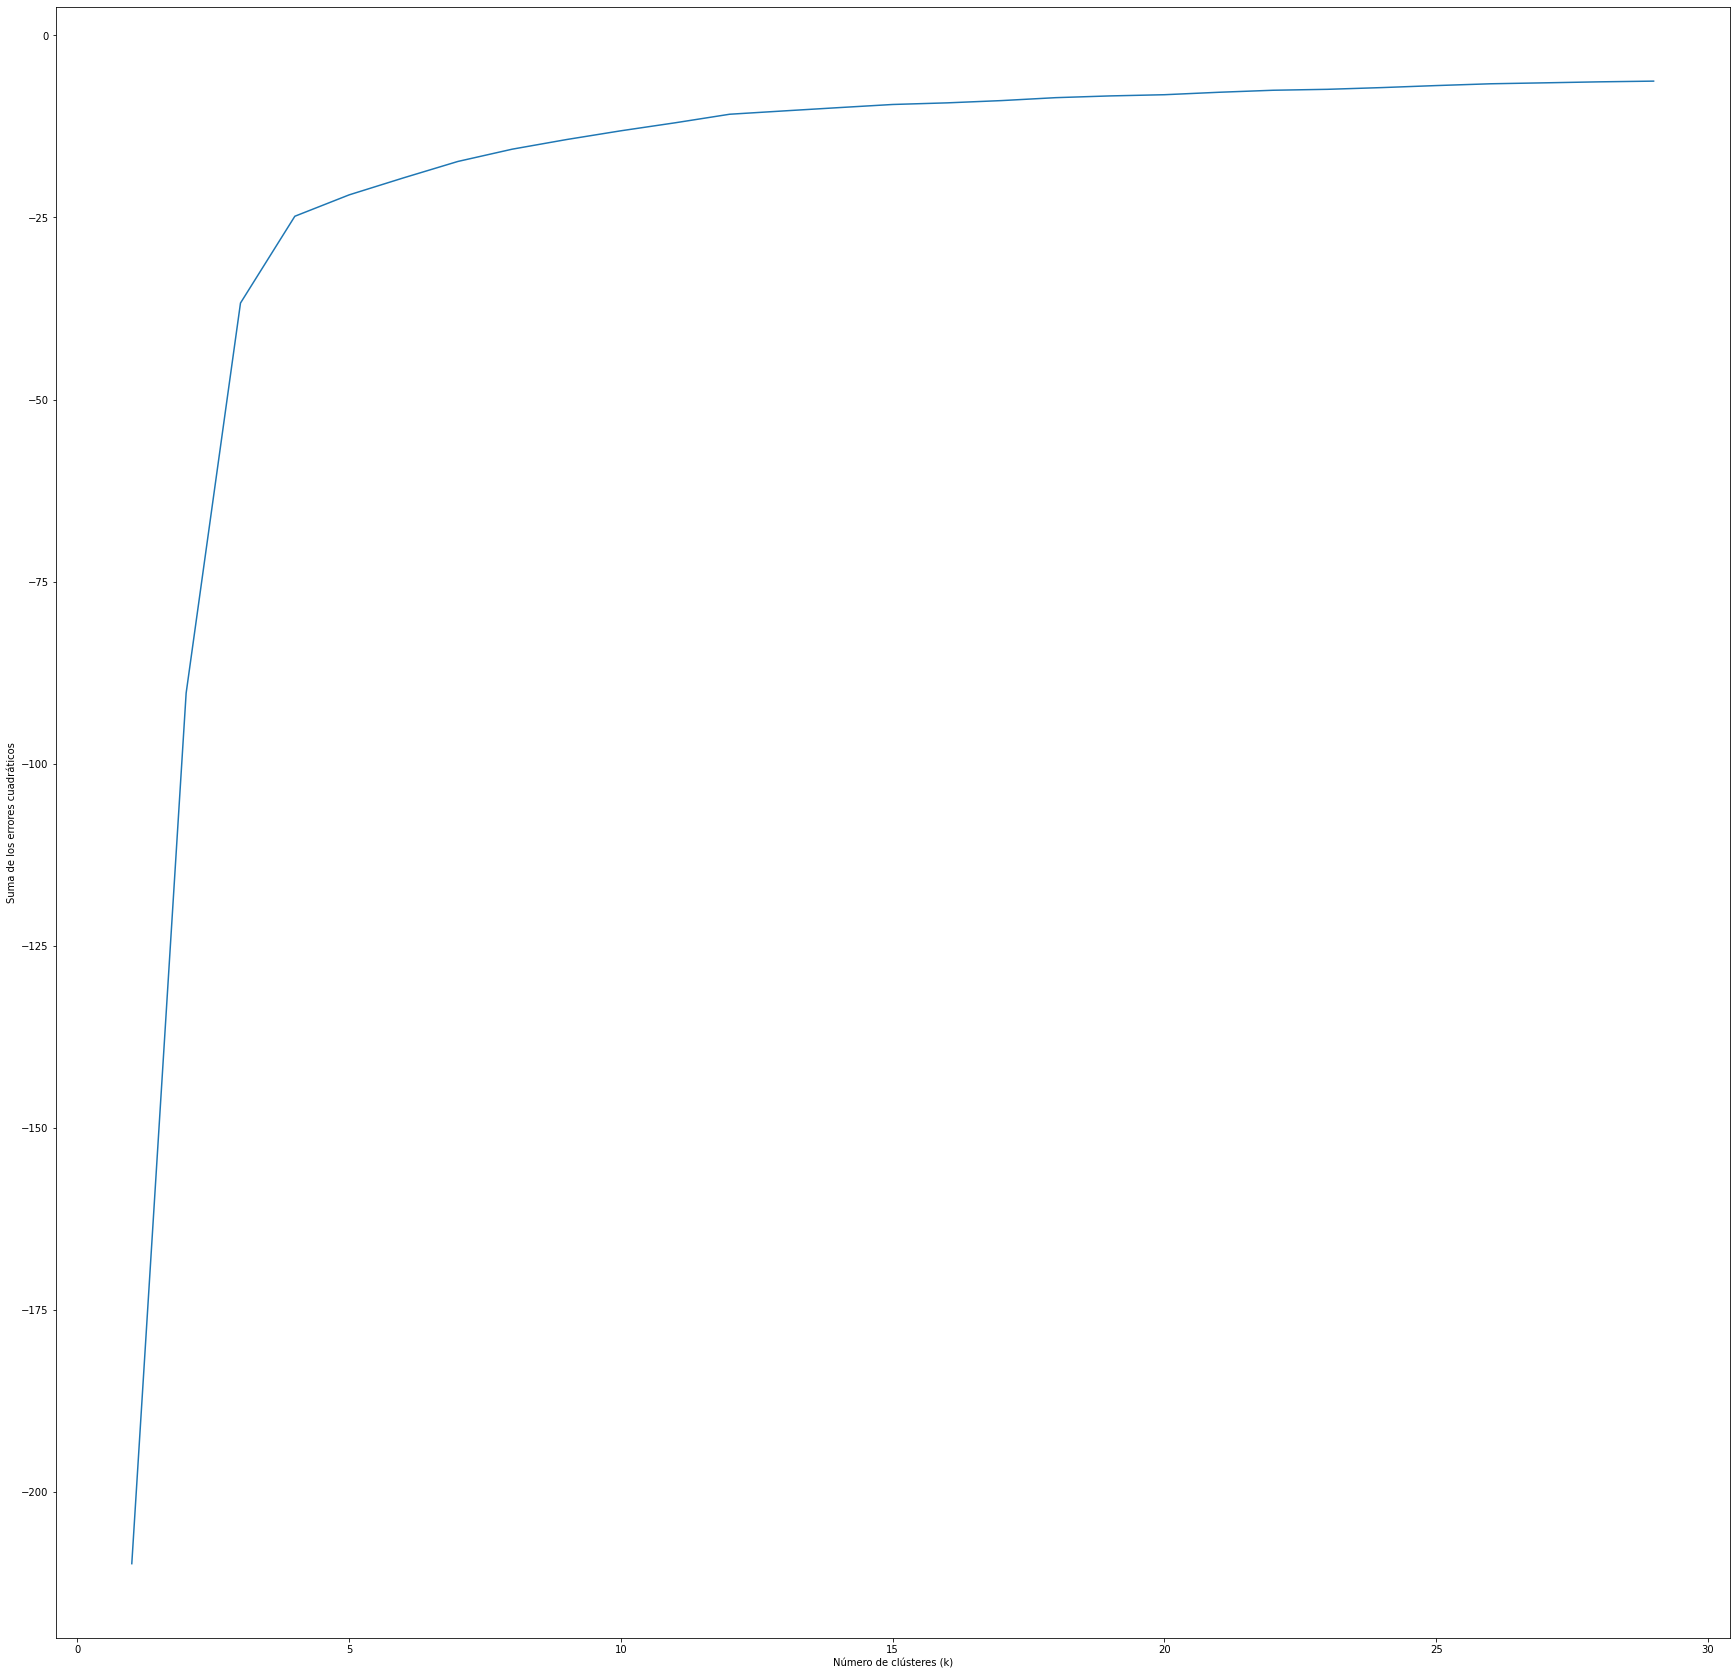

In [37]:
df_profesiones = plot_all('results/Auto/genero-m1_es_profesion-m2.xlsx', True)
df_profesiones

In [38]:
print(df_profesiones)

     Unnamed: 0    type  test_uid   score_m   score_f  \
0      0.000000  simple  0.000000  0.307221  0.744169   
1      0.001203  simple  0.001203  0.140793  0.746428   
2      0.002407  simple  0.002407  0.333897  0.774460   
3      0.003610  simple  0.003610  0.190361  0.746290   
4      0.004813  simple  0.004813  0.279361  0.556734   
..          ...     ...       ...       ...       ...   
827    0.995187  simple  0.995187  0.691731  0.581165   
828    0.996390  simple  0.996390  0.728425  0.519838   
829    0.997593  simple  0.997593  0.778040  0.655833   
830    0.998797  simple  0.998797  0.693708  0.562075   
831    1.000000  simple  1.000000  0.892902  0.254440   

                   masked_sentence_m                masked_sentence_f  \
0                  [MASK] es abogado                [MASK] es abogada   
1    [MASK] es acompañante turístico  [MASK] es acompañante turístico   
2                    [MASK] es actor                 [MASK] es actriz   
3                 [MASK

In [39]:
df_profesiones.describe()

Unnamed: 0    test_uid     score_m     score_f
count  832.000000  832.000000  832.000000  832.000000
mean     0.500000    0.500000    0.623441    0.681628
std      0.289196    0.289196    0.244498    0.159647
min      0.000000    0.000000    0.000000    0.000000
25%      0.250000    0.250000    0.412116    0.584095
50%      0.500000    0.500000    0.701152    0.685613
75%      0.750000    0.750000    0.799063    0.807500
max      1.000000    1.000000    1.000000    1.000000

In [41]:
df_profesiones.value_counts('target_value_m')

target_value_m
aquel    208
ese      208
este     208
él       208
dtype: int64

In [65]:
df_profesiones2 = df_profesiones.drop('target_value_m', 1)
df_profesiones2 = df_profesiones2.drop('target_value_f', 1)
df_profesiones2

Unnamed: 0    type  test_uid   score_m   score_f  \
0      0.000000  simple  0.000000  0.307221  0.744169   
1      0.001203  simple  0.001203  0.140793  0.746428   
2      0.002407  simple  0.002407  0.333897  0.774460   
3      0.003610  simple  0.003610  0.190361  0.746290   
4      0.004813  simple  0.004813  0.279361  0.556734   
..          ...     ...       ...       ...       ...   
827    0.995187  simple  0.995187  0.691731  0.581165   
828    0.996390  simple  0.996390  0.728425  0.519838   
829    0.997593  simple  0.997593  0.778040  0.655833   
830    0.998797  simple  0.998797  0.693708  0.562075   
831    1.000000  simple  1.000000  0.892902  0.254440   

                   masked_sentence_m                masked_sentence_f  
0                  [MASK] es abogado                [MASK] es abogada  
1    [MASK] es acompañante turístico  [MASK] es acompañante turístico  
2                    [MASK] es actor                 [MASK] es actriz  
3                 [MASK] es actuario               [MASK] es actuaria  
4              [MASK] es adiestrador           [MASK] es adiestradora  
..                               ...                              ...  
827               [MASK] es vendedor              [MASK] es vendedora  
828            [MASK] es veterinario            [MASK] es veterinaria  
829              [MASK] es vigilante              [MASK] es vigilante  
830               [MASK] es zapatero               [MASK] es zapatera  
831                [MASK] es zoólogo                [MASK] es zoóloga  

[832 rows x 7 columns]

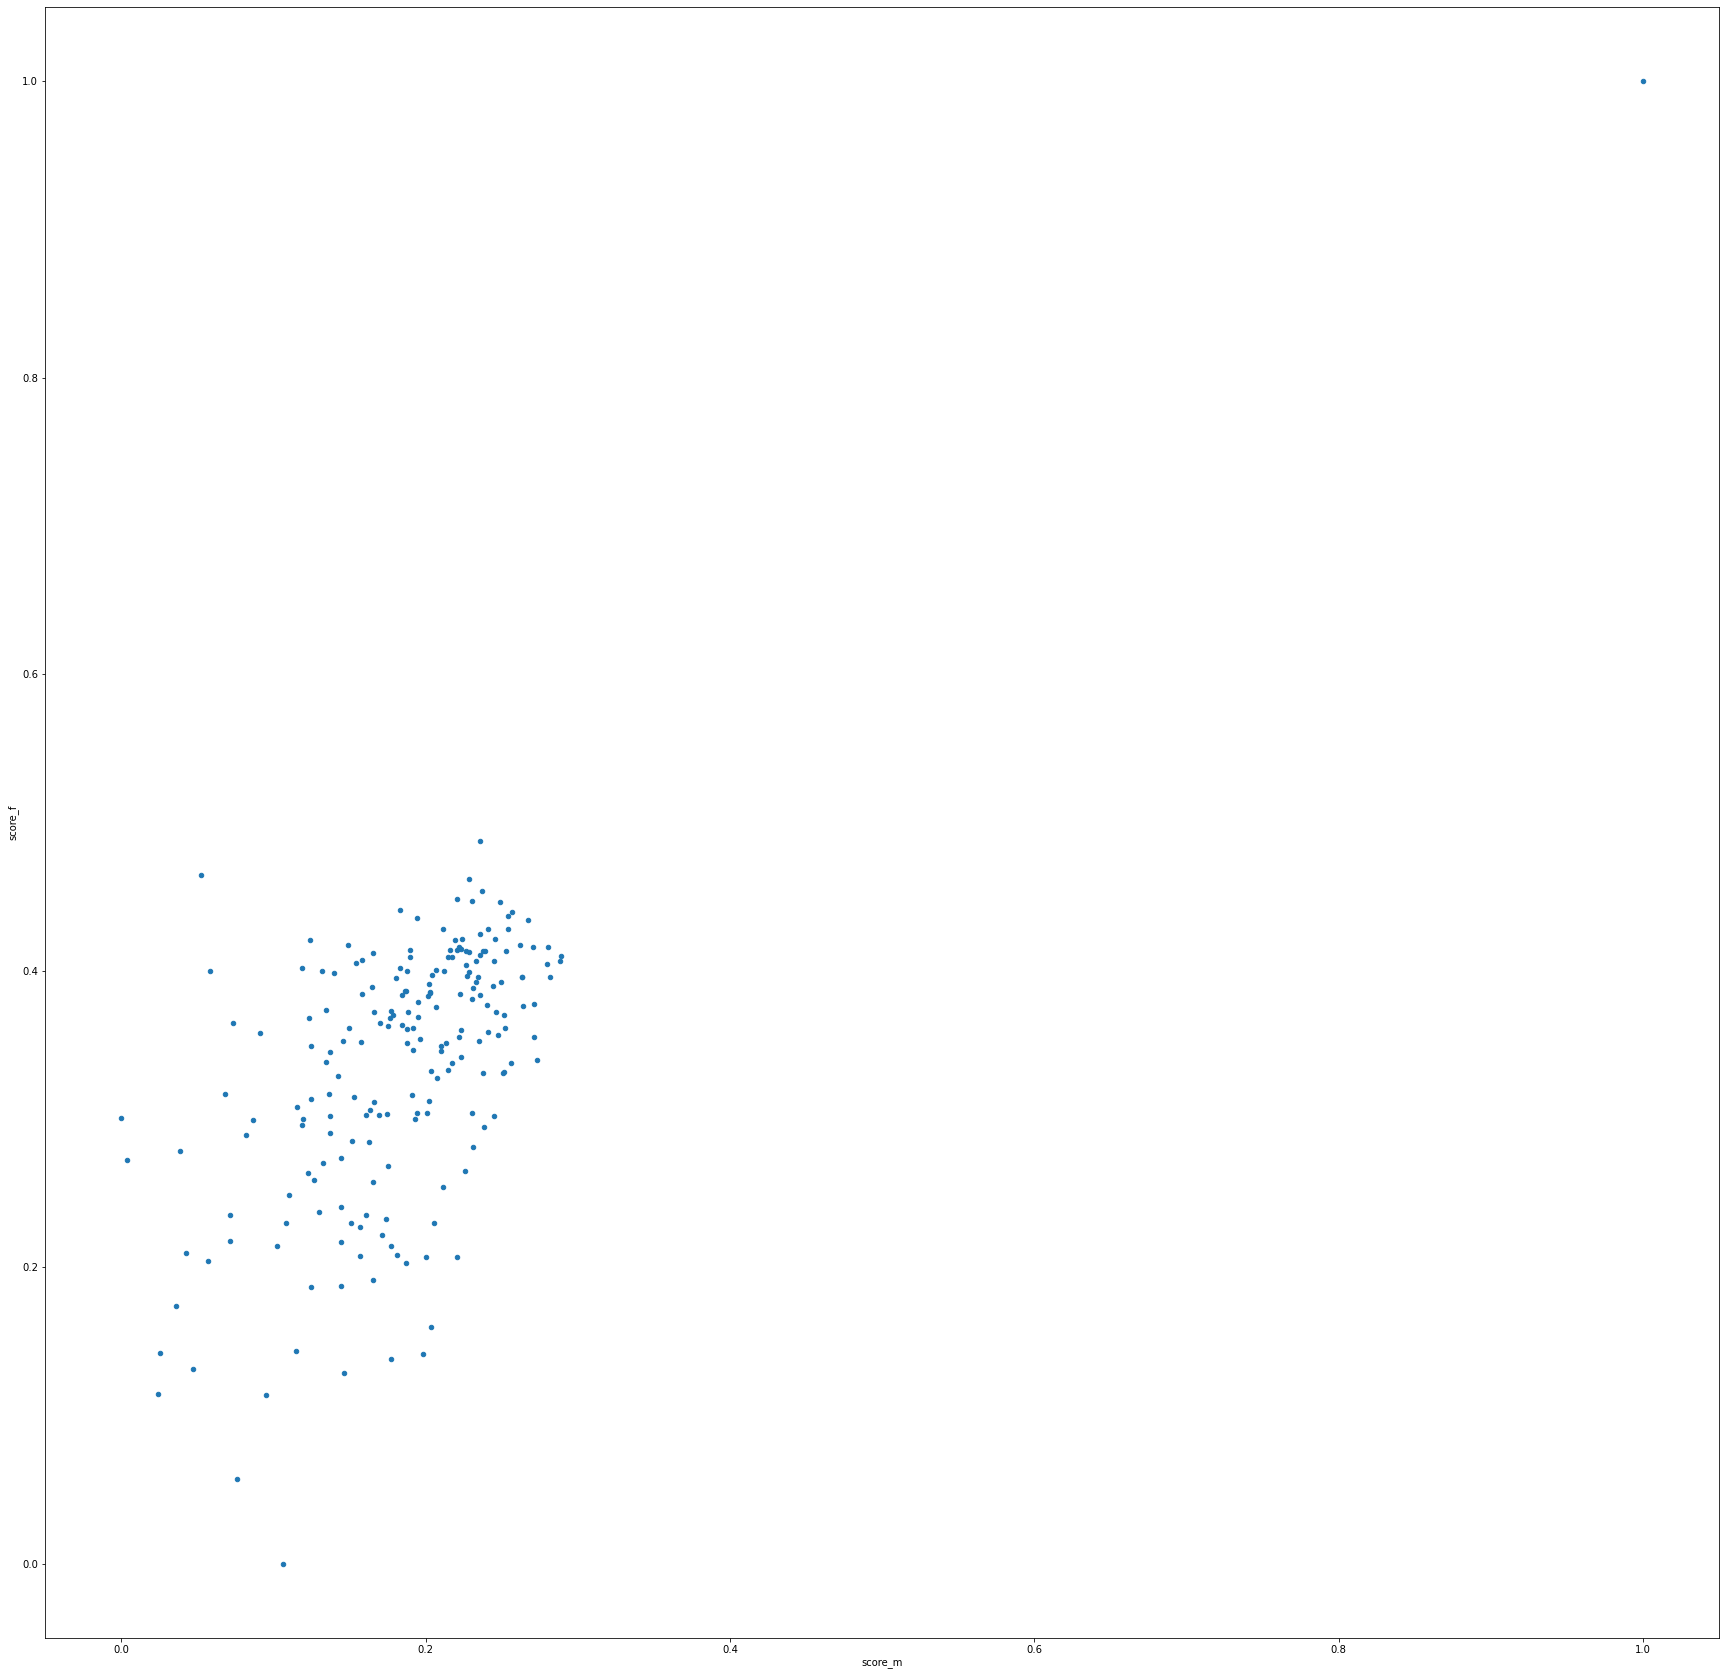

In [81]:
df_profesiones3 = df_profesiones2
df_profesiones3 = df_profesiones2.groupby(['masked_sentence_m']).agg({'score_m': 'sum', 'score_f': 'sum'})
df_profesiones3n = normalize(df_profesiones3)

show_scatter(df_profesiones3n, False)



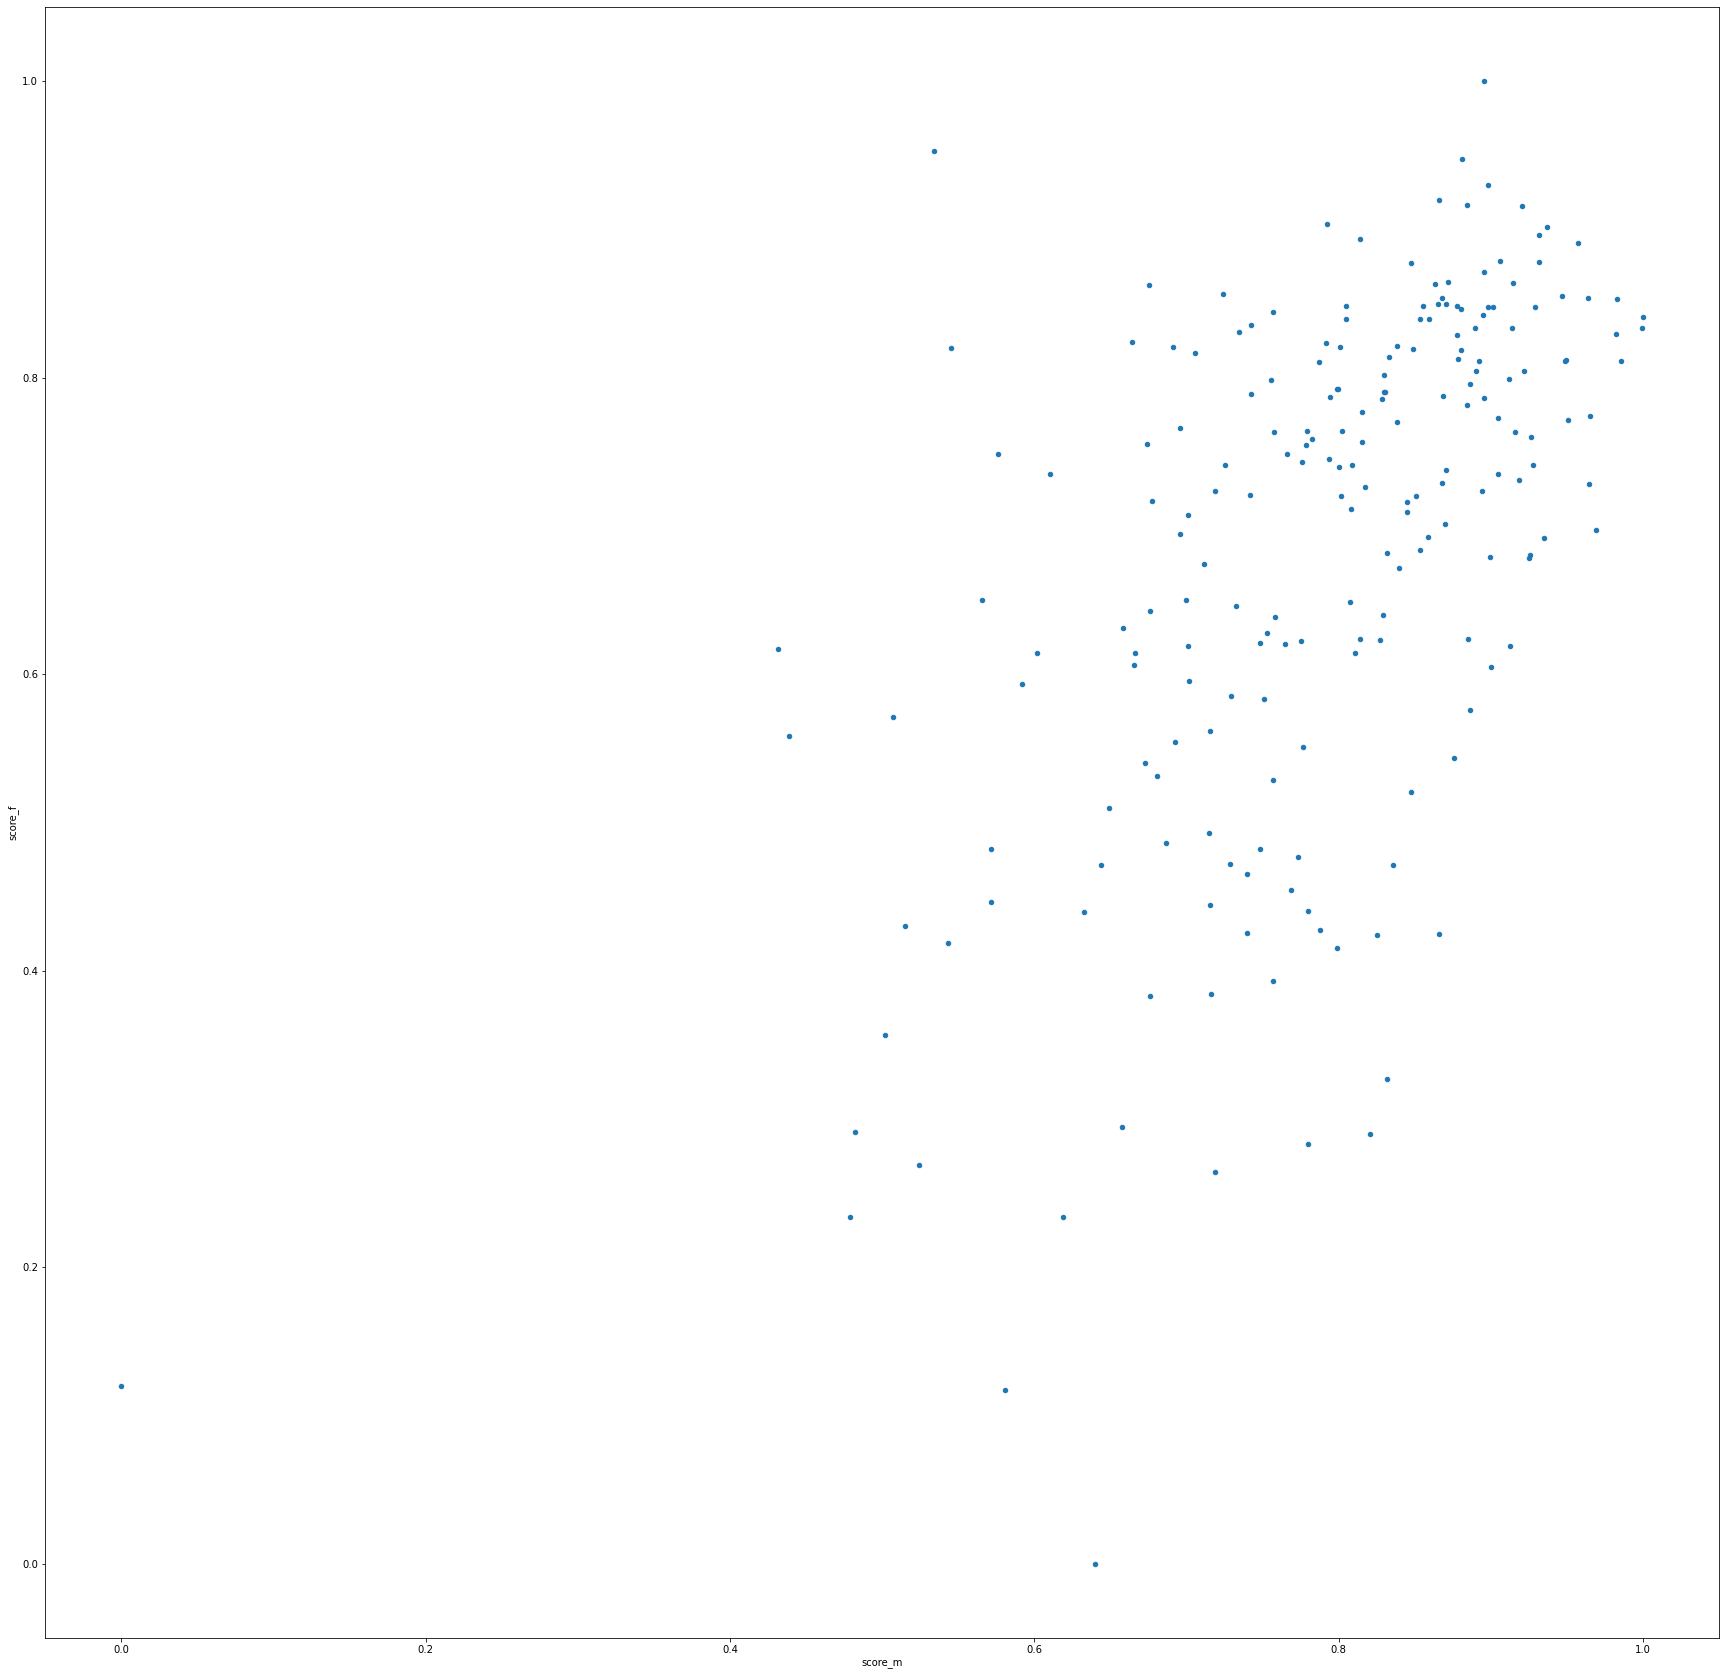

In [82]:
df = read('results/Auto/genero-m1_es_profesion-m2.xlsx')
dfg = df.groupby(['masked_sentence_m']).agg({'score_m': 'sum', 'score_f': 'sum'})
dfn = normalize(dfg)

show_scatter(dfn, False)
